# Import Libraries

In [1]:
import sys, os
import scipy.io, numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# gamma_pop

In [2]:
# exclude seasalt & dust
gamma_pop = np.zeros((3,100,49))
bulk_so4_masses = np.zeros((100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d/0_hydr_noo/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600
            bulk_so4_masses[sce, :] = ncf.variables["bulk_so4_masses"].data * 1e9  # kg to ng

gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()    

d_nsd = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_error * 100,
         "bulk_so4_masses": bulk_so4_masses[:, :].ravel()}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_nsd = pd.DataFrame(data=d_nsd)
print(df_nsd.shape)

df_nsd_2ndngt = df_nsd[((df_nsd.index.values % 49) >= 37) & ((df_nsd.index.values % 49) <= 48)]  # ngt: night
pd.set_option('display.max_rows', df_nsd_2ndngt.shape[0]+1)
print(df_nsd_2ndngt.shape)
# print(df_nsd_2ndngt)

(4900, 4)
(1200, 4)


In [3]:
nsd_case_index = df_nsd_2ndngt.index.values
nsd_sce_index  = (nsd_case_index/49).astype(int)
nsd_hour_index = nsd_case_index % 49

df_nsdon = df_nsd_2ndngt[((np.abs(df_nsd_2ndngt["gamma_pop_error"])) < 20)]
df_nsdabove = df_nsd_2ndngt[((df_nsd_2ndngt["gamma_pop_error"]) >= 20)]
df_nsdbelow = df_nsd_2ndngt[((df_nsd_2ndngt["gamma_pop_error"]) <= -20)]

In [4]:
s = pd.Series([])
for t in range(25,50,1):
    s[t] = t
print(len(s))

37%49

25


37

In [5]:
# include seasalt & dust, 2d simulation
gamma_pop = np.zeros((3,100,49))
bulk_so4_masses = np.zeros((100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d/0_hydr_noo/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600
            bulk_so4_masses[sce, :] = ncf.variables["bulk_so4_masses"].data * 1e9  # kg to ng

gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()

d_wsd = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # wsd: with seasalt and dust
         "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_error * 100,
         "bulk_so4_masses": bulk_so4_masses[:, :].ravel()}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_wsd = pd.DataFrame(data=d_wsd)
print(df_wsd.shape)

df_wsd_2ndngt = df_wsd[((df_wsd.index.values % 49) >= 37) & ((df_wsd.index.values % 49) <= 48)]
print(df_wsd_2ndngt.shape)

(4900, 4)
(1200, 4)


In [6]:
wsd_case_index = df_wsd_2ndngt.index.values
wsd_sce_index  = (wsd_case_index/49).astype(int)
wsd_hour_index = wsd_case_index % 49

df_wsdon = df_wsd_2ndngt[((np.abs(df_wsd_2ndngt["gamma_pop_error"])) < 10)]
df_wsdabove = df_wsd_2ndngt[((df_wsd_2ndngt["gamma_pop_error"]) >= 10)]
df_wsdbelow = df_wsd_2ndngt[((df_wsd_2ndngt["gamma_pop_error"]) <= -10)]

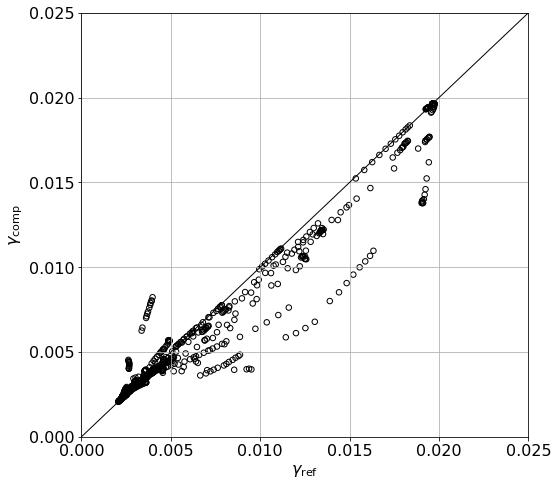

In [14]:
# Only nighttime cases
mpl.rcParams['font.size'] = 16
plt.figure(figsize=(8,7))

# plt.subplot(1,2,1)
# plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
# plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
# a = plt.scatter(df_nsd_2ndngt["gamma_pop_ref"].ravel(), df_nsd_2ndngt["gamma_pop_comp"].ravel(), s=20,facecolors='none', edgecolors='k')
# plt.xlabel(r'$\gamma_{\rm ref}$')
# plt.ylabel(r'$\gamma_{\rm comp}$')
# # plt.title('Library without sea salt and dust emissions')
# plt.grid()

# plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
a = plt.scatter(df_wsd_2ndngt["gamma_pop_ref"].ravel(), df_wsd_2ndngt["gamma_pop_comp"].ravel(), s=30,facecolors='none', edgecolors='k')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
# plt.title('Library with sea salt and dust emissions')
plt.grid()

plt.tight_layout(pad=1.0)
plt.savefig('/data/keeling/a/yicenl2/d/images/1.pdf')

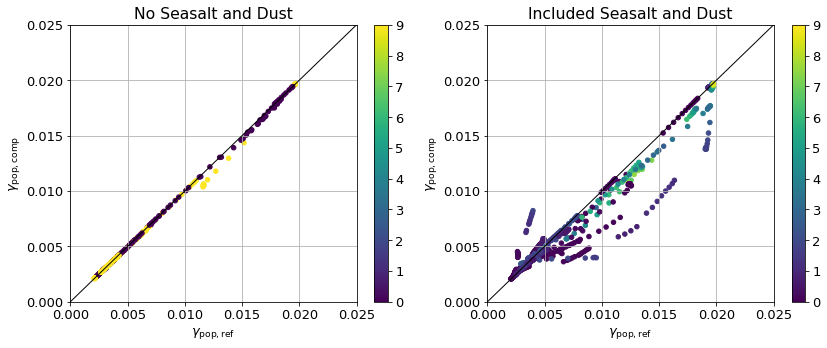

In [47]:
# Only nighttime cases
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
a1 = plt.scatter(df_nsd_2ndngt["gamma_pop_ref"].ravel(), df_nsd_2ndngt["gamma_pop_comp"].ravel(), s=20, c = df_nsd_2ndngt["bulk_so4_masses"])
plt.colorbar()
plt.clim(0,9)
plt.xlabel(r'$\gamma_{\rm pop,ref}$')
plt.ylabel(r'$\gamma_{\rm pop,comp}$')
plt.title('No Seasalt and Dust')
plt.grid()

plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
a2 = plt.scatter(df_wsd_2ndngt["gamma_pop_ref"].ravel(), df_wsd_2ndngt["gamma_pop_comp"].ravel(), s=20, c = df_wsd_2ndngt["bulk_so4_masses"])
plt.colorbar()
plt.clim(0,9)
plt.xlabel(r'$\gamma_{\rm pop,ref}$')
plt.ylabel(r'$\gamma_{\rm pop,comp}$')
plt.title('Included Seasalt and Dust')
plt.grid()

plt.tight_layout(pad=1.0)

# h1, h2, hgamma

In [9]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d/0_hydr_noo/scenarios'
h1_nsd = np.zeros((100,49,180)) # gamma * surf_dist
h2_nsd = np.zeros((100,49,180)) # surf_area_dist
hgamma_nsd = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_nsd[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m3 to cm-3
            h2_nsd[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m3 to cm-3
            hgamma_nsd[sce_index, t_index,:] = h1_nsd[sce_index, t_index,:]/h2_nsd[sce_index, t_index,:]

In [11]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d/0_hydr_noo/scenarios'
h1_wsd = np.zeros((100,49,180)) # gamma * surf_dist
h2_wsd = np.zeros((100,49,180)) # surf_area_dist
hgamma_wsd = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_wsd[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m3 to cm-3
            h2_wsd[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m3 to cm-3
            hgamma_wsd[sce_index, t_index,:] = h1_wsd[sce_index, t_index,:]/h2_wsd[sce_index, t_index,:]
            

## $\gamma_{\rm pop, comp} < \gamma_{\rm pop, ref}$ (underestimate)

In [15]:
print(df_wsdbelow.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_wsdbelow.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wsdbelow.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error  bulk_so4_masses
872        0.013161        0.011845       -10.000971         7.399002
1322       0.005056        0.004549       -10.036533         1.529364
338        0.003516        0.003159       -10.144118         0.054586
870        0.012184        0.010939       -10.221592         7.511238
871        0.012820        0.011496       -10.330825         7.548207
832        0.009491        0.008503       -10.409867         2.813209
339        0.003558        0.003177       -10.705223         0.052549
244        0.014346        0.012781       -10.913087         7.257292
1556       0.004938        0.004397       -10.949909         0.207065
340        0.003586        0.003188       -11.105673         0.050591
243        0.013515        0.011954       -11.551686         7.088606
341        0.003618        0.003198       -11.596047         0.048289
342        0.003629        0.003202       -11.764790         0.045713
1557       0.005101 

In [16]:
print(df_nsdbelow.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_nsdbelow.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)

Empty DataFrame
Columns: [gamma_pop_ref, gamma_pop_comp, gamma_pop_error, bulk_so4_masses]
Index: []
[]
[]


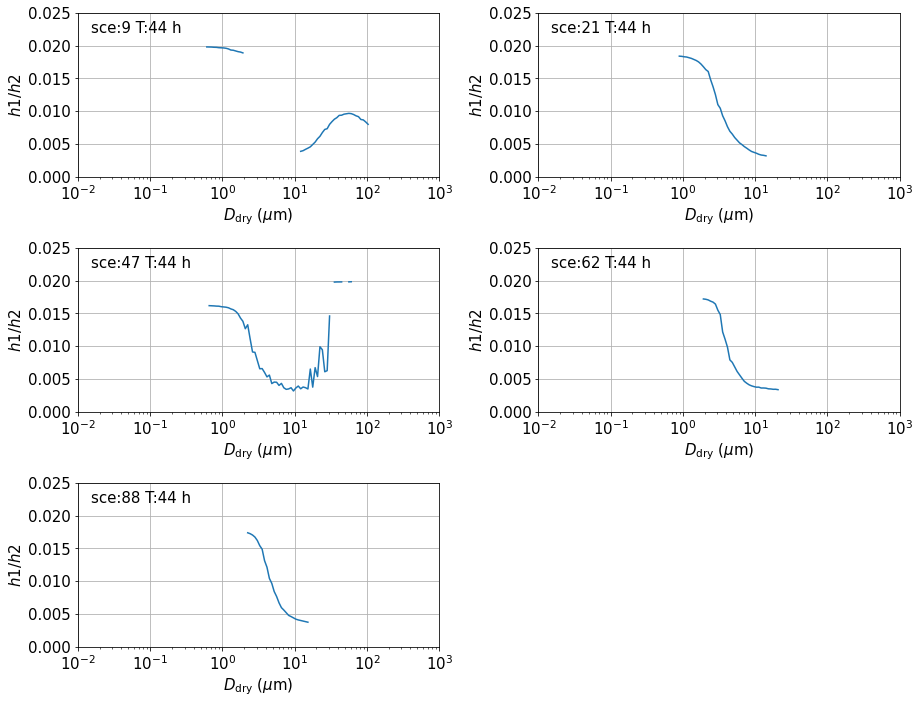

In [17]:
plt.figure(figsize=(13,10))

sce_index = pd.Series([9,21,47,62,88])
# print(sce_index)

t_index = 44
for i in range(5):
#     print(i)
    plt.subplot(3,2,i+1)
    plt.plot(diam, hgamma_wsd[sce_index[i], t_index,:])
    plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,0.025)
    plt.ylabel(r'$h1/h2$')
    plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    plt.text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index))
    plt.grid()
    plt.tight_layout(pad = 1.0)

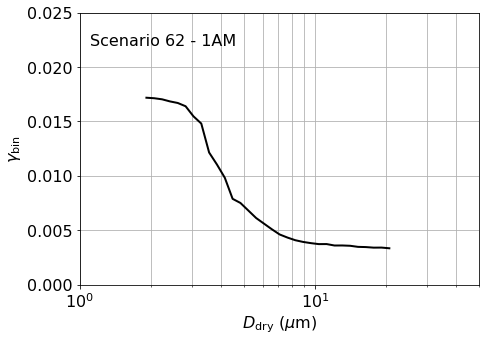

In [31]:
plt.figure(figsize=(7,5))

plt.plot(diam, hgamma_wsd[62, 44,:],lw=2,color='k')
plt.xscale('log');plt.xlim(1e0, 5e1);plt.ylim(0,0.025)
plt.ylabel(r'$\gamma_{\rm bin}$')
plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
plt.text(1.1, 0.022, r'Scenario 62 - 1AM')
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout(pad=1.0)

plt.savefig('/data/keeling/a/yicenl2/d/images/2.pdf')

## $\gamma_{\rm pop, comp} > \gamma_{\rm pop, ref}$ (overestimate)

In [22]:
print(df_wsdabove.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_wsdabove.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wsdabove.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error  bulk_so4_masses
723        0.003980        0.008229       106.767835         1.905951
724        0.003921        0.008035       104.930790         1.813356
725        0.003867        0.007886       103.946104         1.726600
726        0.003934        0.008012       103.673981         1.617970
727        0.003848        0.007776       102.088322         1.533589
728        0.003794        0.007608       100.530436         1.456295
729        0.003725        0.007385        98.241912         1.372796
730        0.003682        0.007258        97.106493         1.312336
731        0.003644        0.007106        94.984413         1.241713
732        0.003617        0.007007        93.727979         1.180374
733        0.003413        0.006438        88.648547         1.126073
734        0.003367        0.006261        85.969125         1.067214
4790       0.002626        0.004536        72.728269         0.349465
4791       0.002637 

In [23]:
print(df_nsdabove.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_nsdabove.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)

Empty DataFrame
Columns: [gamma_pop_ref, gamma_pop_comp, gamma_pop_error, bulk_so4_masses]
Index: []
[]
[]


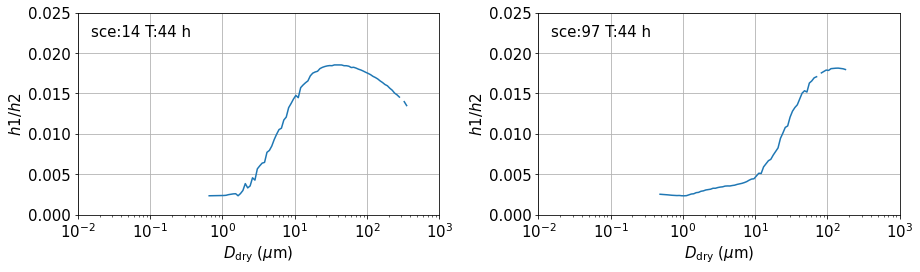

In [20]:
plt.figure(figsize=(13,4))

sce_index = pd.Series([14,97])
# print(sce_index)

t_index = 44
for i in range(2):
#     print(i)
    plt.subplot(1,2,i+1)
    plt.plot(diam, hgamma_wsd[sce_index[i], t_index,:])
    plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,0.025)
    plt.ylabel(r'$h1/h2$')
    plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    plt.text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index))
    plt.grid()
    plt.tight_layout(pad = 1.0)

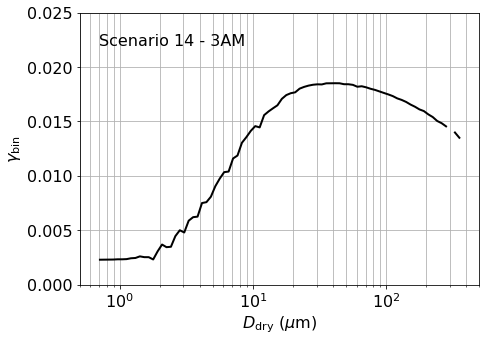

In [32]:
plt.figure(figsize=(7,5))

plt.plot(diam, hgamma_wsd[14, 46,:],lw=2,color='k')
plt.xscale('log');plt.xlim(5e-1, 5e2);plt.ylim(0,0.025)
plt.ylabel(r'$\gamma_{\rm bin}$')
plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
plt.text(0.7, 0.022, r'Scenario 14 - 3AM')
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout(pad=1.0)

plt.savefig('/data/keeling/a/yicenl2/d/images/3.pdf')

## $\gamma_{\rm pop, comp} \approx \gamma_{\rm pop, ref}$ (similar)

In [26]:
print(df_wsdon.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_wsdon.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
# pd.set_option('max_rows', 20)
print(df_wsdon.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error  bulk_so4_masses
3811       0.003586        0.003943         9.952804         2.454064
97         0.003932        0.004323         9.943011         0.072008
3810       0.003604        0.003962         9.942146         2.569327
3812       0.003567        0.003915         9.763361         2.330213
3813       0.003551        0.003892         9.578900         2.233245
3816       0.003532        0.003870         9.566195         1.921579
3817       0.003526        0.003862         9.510059         1.820576
3815       0.003535        0.003870         9.470434         2.005201
3814       0.003541        0.003874         9.420403         2.108929
3818       0.003548        0.003874         9.182583         1.744588
2985       0.002999        0.003274         9.170362         0.032341
2977       0.003054        0.003332         9.124530         0.041573
2986       0.002981        0.003250         9.016709         0.030106
2983       0.003034 

In [27]:
print(df_nsdon.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_nsdon.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
# pd.set_option('max_rows', 20)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error  bulk_so4_masses
2879       0.006914        0.006927         0.192466         7.160957
4605       0.017831        0.017858         0.151540         0.218984
2880       0.007055        0.007065         0.150206         6.856452
4604       0.017915        0.017940         0.140835         0.230217
4603       0.018041        0.018066         0.135497         0.240833
4602       0.018213        0.018237         0.130742         0.252486
4601       0.018430        0.018451         0.119066         0.262812
2881       0.007242        0.007249         0.099343         6.557365
4600       0.018652        0.018670         0.094226         0.275134
4599       0.018832        0.018846         0.077459         0.290879
4598       0.019104        0.019117         0.065184         0.305600
4597       0.019288        0.019295         0.040180         0.314943
2882       0.007476        0.007478         0.035269         6.232527
4596       0.019349 

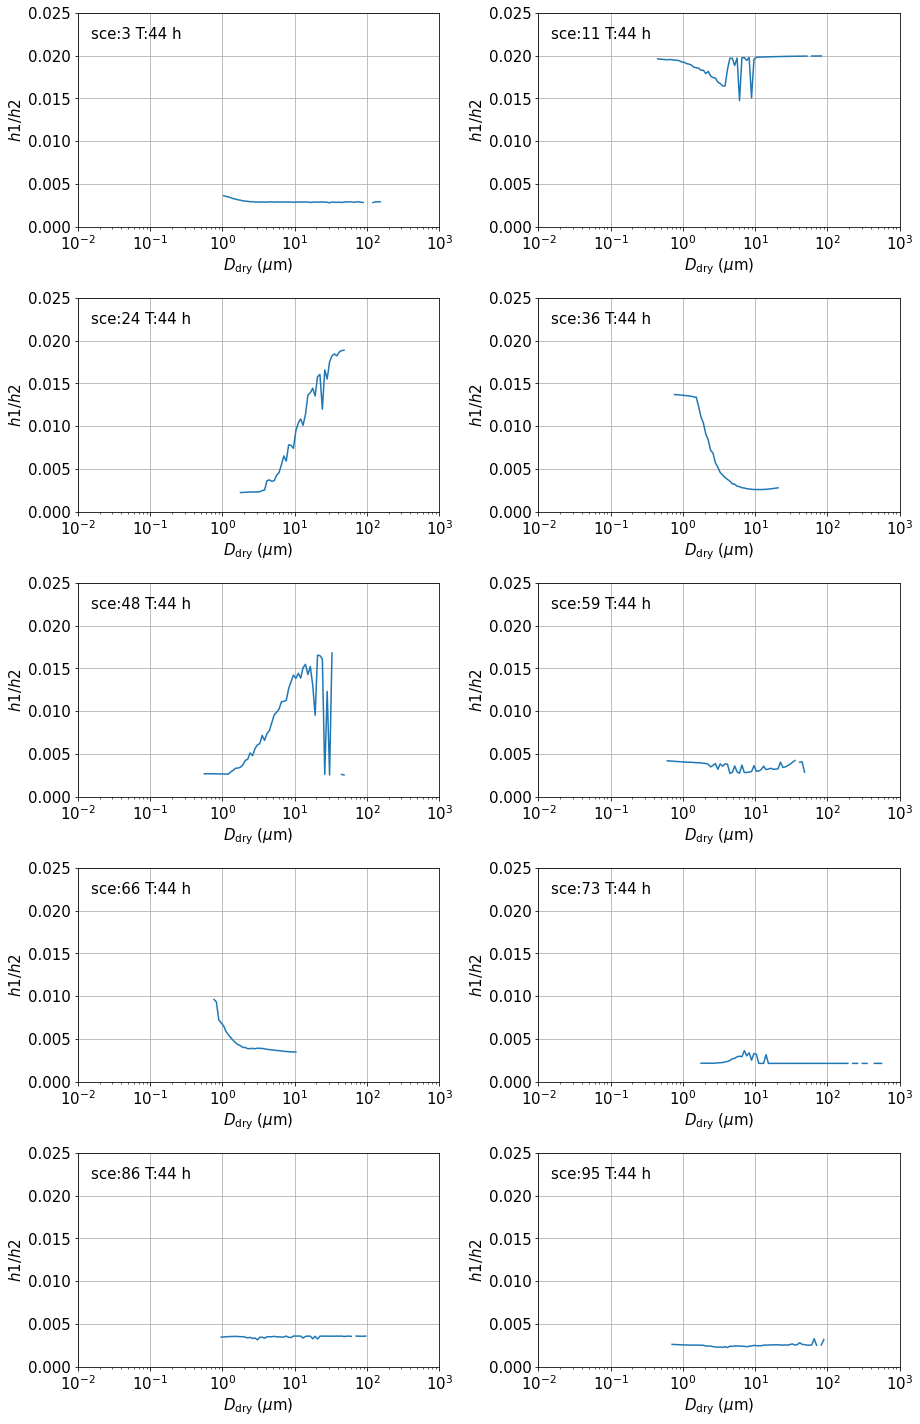

In [23]:
plt.figure(figsize=(13,20))

sce_index = pd.Series([3,11,24,36,48,59,66,73,86,95])
# print(sce_index)

t_index = 44
for i in range(10):
#     print(i)
    plt.subplot(5,2,i+1)
    plt.plot(diam, hgamma_wsd[sce_index[i], t_index,:])
    plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,0.025)
    plt.ylabel(r'$h1/h2$')
    plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    plt.text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index))
    plt.grid()
    plt.tight_layout(pad = 1.0)

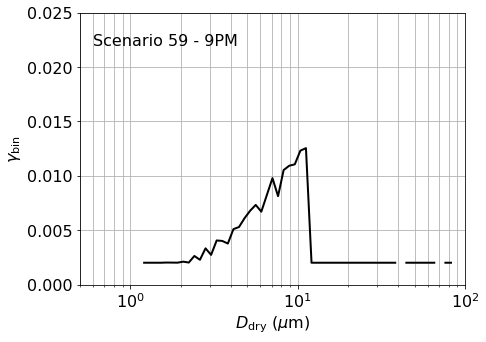

In [33]:
plt.figure(figsize=(7,5))

plt.plot(diam, hgamma_wsd[49, 40,:],lw = 2,color='k')
plt.xscale('log');plt.xlim(5e-1, 1e2);plt.ylim(0,0.025)
plt.ylabel(r'$\gamma_{\rm bin}$')
plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
plt.text(0.6, 0.022, r'Scenario 59 - 9PM')
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout(pad=1.0)

plt.savefig('/data/keeling/a/yicenl2/d/images/4.pdf')

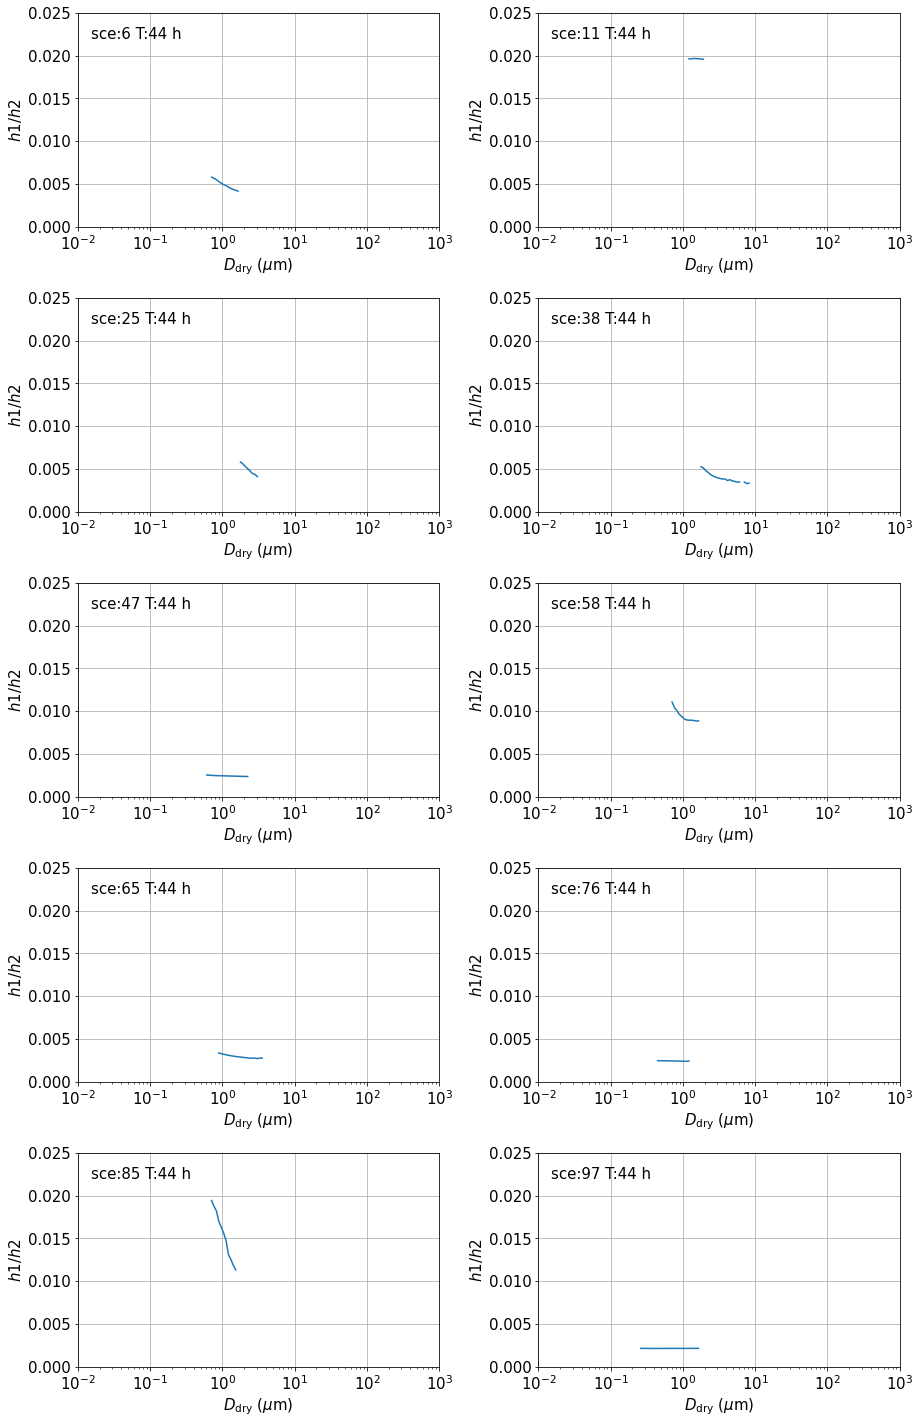

In [24]:
plt.figure(figsize=(13,20))

sce_index = pd.Series([6,11,25,38,47,58,65,76,85,97])
# print(sce_index)

t_index = 44
for i in range(10):
#     print(i)
    plt.subplot(5,2,i+1)
    plt.plot(diam, hgamma_nsd[sce_index[i], t_index,:])
    plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,0.025)
    plt.ylabel(r'$h1/h2$')
    plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    plt.text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index))
    plt.grid()
    plt.tight_layout(pad = 1.0)

# parameter space

In [16]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin'])
print(s)
print('bulk_'+ s[0] + '_masses')

0    no3
1    so4
2     oc
3    soa
4    nh4
5     na
6     cl
7     bc
8    oin
dtype: object
bulk_no3_masses


In [18]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d/0_hydr_noo/scenarios"
nbulk_masses = np.zeros((9,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(8):
                nbulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

d_nsdm = {'bulk_'+ s[0] + '_masses': nbulk_masses[0,:,:].ravel(),
          'bulk_'+ s[1] + '_masses': nbulk_masses[1,:,:].ravel(),
          'bulk_'+ s[2] + '_masses': nbulk_masses[2,:,:].ravel(),
          'bulk_'+ s[3] + '_masses': nbulk_masses[3,:,:].ravel(),
          'bulk_'+ s[4] + '_masses': nbulk_masses[4,:,:].ravel(),
          'bulk_'+ s[5] + '_masses': nbulk_masses[5,:,:].ravel(),
          'bulk_'+ s[6] + '_masses': nbulk_masses[6,:,:].ravel(),
          'bulk_'+ s[7] + '_masses': nbulk_masses[7,:,:].ravel(),
          'bulk_'+ s[8] + '_masses': nbulk_masses[8,:,:].ravel(),
          'bulk_org_masses': nbulk_masses[2,:,:].ravel() + nbulk_masses[3,:,:].ravel()}
df_nsdm = pd.DataFrame(data=d_nsdm)
print(df_nsdm.shape)
df_nsdm_2ndngt = df_nsdm[((df_nsdm.index.values % 49) >= 37) & ((df_nsdm.index.values % 49) <= 48)]  # ngt: night
print(df_nsdm_2ndngt.shape)

(4900, 10)
(1200, 10)


In [19]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d/0_hydr_noo/scenarios"
bulk_masses = np.zeros((9,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(9):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

d_wsdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df_wsdm = pd.DataFrame(data=d_wsdm)
print(df_wsdm.shape)
df_wsdm_2ndngt = df_wsdm[((df_wsdm.index.values % 49) >= 37) & ((df_wsdm.index.values % 49) <= 48)]  # ngt: night
print(df_wsdm_2ndngt.shape)

(4900, 10)
(1200, 10)


## pdf

In [30]:
for i in range(9):
    print(i)

0
1
2
3
4
5
6
7
8


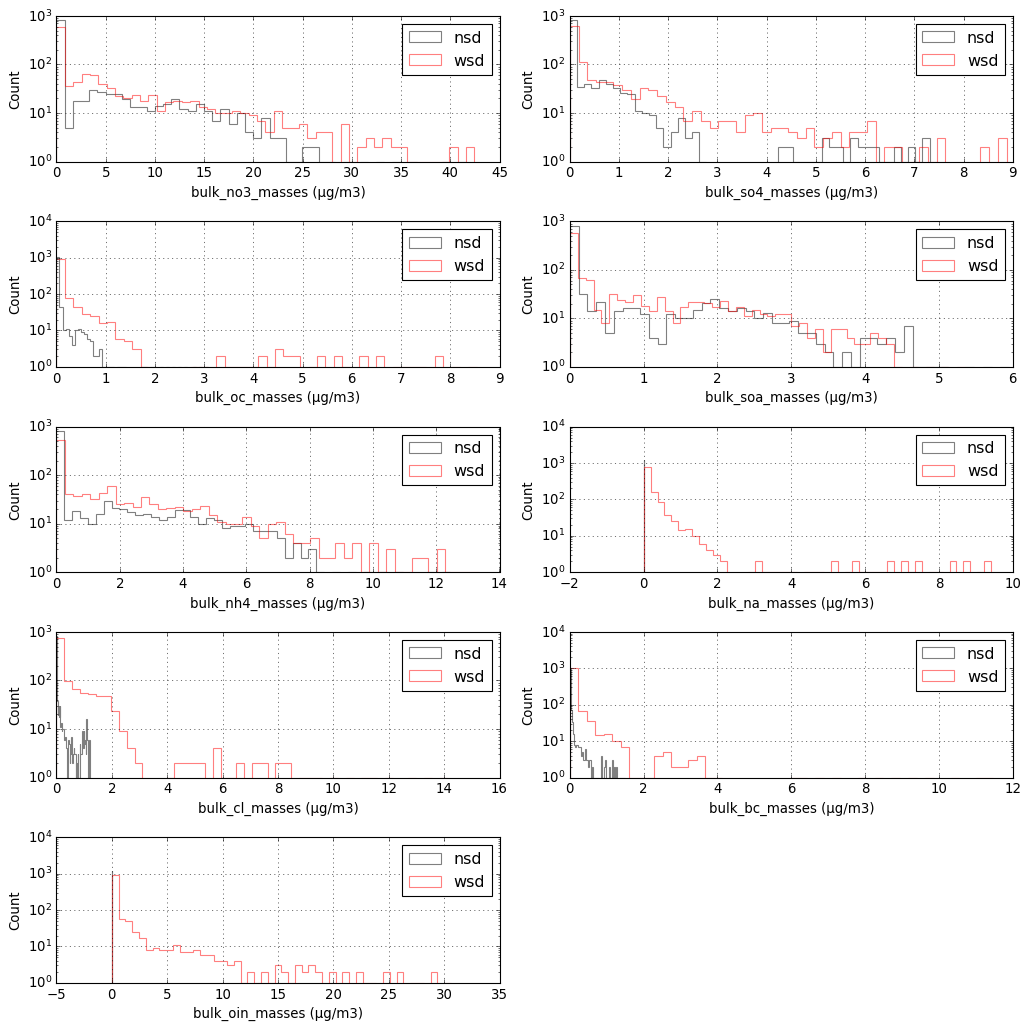

In [21]:
# black: no seasalt & dust, red: with seasalt & dust
plt.figure(figsize=(13,13))

for i in range(9):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_nsdm_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = 'nsd')
    plt.hist(data = df_wsdm_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'r', alpha=0.5, histtype = 'step', label = 'wsd')
    plt.xlabel('bulk_'+ s[i] + '_masses (µg/m3)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid()
    plt.tight_layout(pad = 1.0)

##  no3 vs. org - 2D density distribution

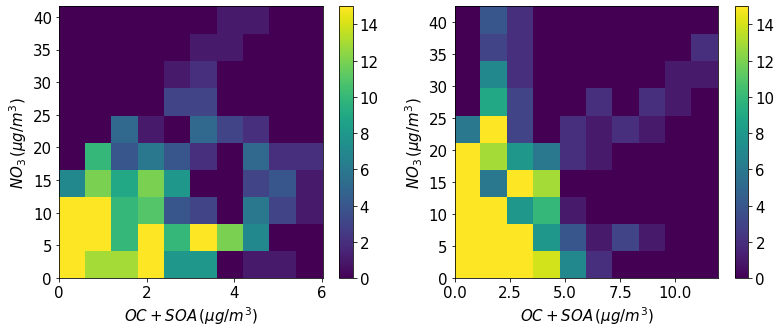

In [25]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
x = df_nsdm_2ndngt['bulk_org_masses'].ravel()
y = df_nsdm_2ndngt['bulk_no3_masses'].ravel()
a = plt.hist2d(x,y)
plt.xlabel(r'$OC+SOA \,(\mu g/m^3)$')
plt.ylabel(r'$NO_3 \,(\mu g/m^3)$')
plt.colorbar(a[3])
plt.clim(0,15)

plt.subplot(1,2,2)
x = df_wsdm_2ndngt['bulk_org_masses'].ravel()
y = df_wsdm_2ndngt['bulk_no3_masses'].ravel()
a = plt.hist2d(x,y)
plt.xlabel(r'$OC+SOA \,(\mu g/m^3)$')
plt.ylabel(r'$NO_3 \,(\mu g/m^3)$')
plt.colorbar(a[3])
plt.clim(0,15)

# 2d size distribution

In [2]:
s = pd.Series(['no3','so4','h2o','nh4','bc','oin','cl','na','ca','co3','oc','soa','wi'])
print(s)

0     no3
1     so4
2     h2o
3     nh4
4      bc
5     oin
6      cl
7      na
8      ca
9     co3
10     oc
11    soa
12     wi
dtype: object


In [3]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d/0_hydr_noo'

for i in range(13):
    mass_frac_dist = np.zeros((13,2,100,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            t_index = int(filename[-13:-11]) - 1
            case_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(13):
                mass_frac_dist[i, 0, case_index, t_index,:,:] = ncf.variables["diam_" + s[i] 
                                                               + "_dist_pr"].data * 1e-6
                mass_frac_dist[i, 1, case_index, t_index,:,:] = ncf.variables["diam_" + s[i] 
                                                               + "_dist_avg"].data * 1e-6

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(9,36))
X, Y = np.meshgrid(diam_edges, bc_edges)
case_index = 29
t_index = 5

for i in range(13):
    str1 = "mass_frac_" + s[i] + "_PR"
    plt.subplot(13,2,2*i+1)
    p = plt.pcolormesh (X, Y, mass_frac_dist[i, 0, case_index, t_index,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')

    plt.ylim(0,1)
    plt.ylabel(str1)
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h $\Delta$:%.2f'% (case_index, t_index, 
                                               error_2d[case_index,t_index]*100))
    plt.grid(True)
#*************
    str2 = "mass_frac_" + s[i] + "_CA"
    plt.subplot(13,2,2*i+2)
    p = plt.pcolormesh (X, Y, mass_frac_dist[i, 1, case_index, t_index,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')

    plt.ylim(0,1)
    plt.ylabel(str2)
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h $\Delta$:%.2f'% (case_index, t_index, 
                                               error_2d[case_index,t_index]*100))
    plt.grid(True)

# The impacts of mixing states

In [34]:
# Read data
gas_mixing_ratio = np.zeros((3, 100, 49, 77))
sce_ind = np.zeros(100)
lib_ind = np.zeros(3)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            lib = int(filename[-67:-66])
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[lib, sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            lib_ind[lib] = lib
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [35]:
n2o5_error = (gas_mixing_ratio[2, :, :, 7].ravel() - 
               gas_mixing_ratio[1, :, :, 7].ravel())/gas_mixing_ratio[1, :, :, 7].ravel()      

d_gas = {'n2o5_ref': gas_mixing_ratio[1, :, :, 7].ravel(),
         'n2o5_comp': gas_mixing_ratio[2, :, :, 7].ravel(),
         'n2o5_error': n2o5_error*100,
         'o3_ref': gas_mixing_ratio[1, :, :, 10].ravel(),
         'o3_comp': gas_mixing_ratio[2, :, :, 10].ravel(),
         'no_ref': gas_mixing_ratio[1, :, :, 4].ravel(),
         'no_comp': gas_mixing_ratio[2, :, :, 4].ravel(),
         'no2_ref': gas_mixing_ratio[1, :, :, 5].ravel(),
         'no2_comp': gas_mixing_ratio[2, :, :, 5].ravel(),
         'hno3_ref': gas_mixing_ratio[1, :, :, 1].ravel(),
         'hno3_comp': gas_mixing_ratio[2, :, :, 1].ravel()}
df_gas = pd.DataFrame(data=d_gas)

In [36]:
df_gas_2ndngt = df_gas[((df_gas.index.values % 49) >= 37) & ((df_gas.index.values % 49) <= 48)]  # ngt: night
print(df_gas_2ndngt.shape)

df_gas_2ndday = df_gas[((df_gas.index.values % 49) >= 25) & ((df_gas.index.values % 49) <= 48)]
print(df_gas_2ndday.shape)

case_index = df_gas_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

dn_case_index = df_gas_2ndday.index.values  # dn: day and night
dn_sce_index  = (dn_case_index/49).astype(int)
dn_hour_index = dn_case_index % 49

(1200, 11)
(2400, 11)


In [37]:
df_gason = df_gas_2ndngt[((np.abs(df_gas_2ndngt["n2o5_error"])) < 10)]
df_gasabove = df_gas_2ndngt[((df_gas_2ndngt["n2o5_error"]) >= 10)]
df_gasbelow = df_gas_2ndngt[((df_gas_2ndngt["n2o5_error"]) <= -10)]

print(df_gasbelow.sort_values(by='n2o5_error', ascending=False))

      n2o5_ref  n2o5_comp  n2o5_error      o3_ref     o3_comp    no_ref  \
2541  0.246060   0.221225  -10.092869   96.063415   96.377223  0.000010   
41    7.585700   6.815701  -10.150670   34.142463   35.694792  0.000244   
3082  0.000890   0.000799  -10.156541  175.881235  170.820408  0.139736   
1562  0.000233   0.000210  -10.184761  111.596736  109.840630  0.113657   
1561  0.000257   0.000230  -10.398192  110.224665  108.580392  0.120168   
2589  0.000099   0.000088  -10.500199  115.051510  112.964230  0.111730   
2542  0.269458   0.241103  -10.522899   93.465377   93.772074  0.000009   
3422  0.001549   0.001384  -10.653766  177.586778  177.015615  0.344381   
2540  0.187314   0.167338  -10.664588   98.839577   99.158752  0.000012   
2595  0.007952   0.007103  -10.672772  103.720922  102.019727  0.000006   
3420  0.002936   0.002623  -10.673641  147.336067  150.007937  0.883962   
3811  2.998996   2.678128  -10.699191   70.373095   70.484080  0.000047   
2543  0.273632   0.244281

In [3]:
# Read data
ngas_mixing_ratio = np.zeros((3, 100, 49, 77))
nsce_ind = np.zeros(100)
nlib_ind = np.zeros(3)
nhour = np.zeros(49)
ntime = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            nlib = int(filename[-67:-66])
            nsce = int(filename[-35:-33])
            nhr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            ngas_mixing_ratio[nlib, nsce, nhr, :] = ncf.variables["gas_mixing_ratio"].data
            nsce_ind[nsce] = nsce
            nlib_ind[nlib] = nlib
            ntime[nhr] =  ncf.variables["time"].data/3600
            nhour[:] = nhr

nd_gas = {'n2o5_ref': ngas_mixing_ratio[1, :, :, 7].ravel(),
         'n2o5_comp': ngas_mixing_ratio[2, :, :, 7].ravel(),
         'o3_ref': ngas_mixing_ratio[1, :, :, 10].ravel(),
         'o3_comp': ngas_mixing_ratio[2, :, :, 10].ravel(),
         'no_ref': ngas_mixing_ratio[1, :, :, 4].ravel(),
         'no_comp': ngas_mixing_ratio[2, :, :, 4].ravel(),
         'no2_ref': ngas_mixing_ratio[1, :, :, 5].ravel(),
         'no2_comp': ngas_mixing_ratio[2, :, :, 5].ravel(),
         'hno3_ref': ngas_mixing_ratio[1, :, :, 1].ravel(),
         'hno3_comp': ngas_mixing_ratio[2, :, :, 1].ravel()}
ndf_gas = pd.DataFrame(data=nd_gas)

In [4]:
ndf_gas_2ndngt = ndf_gas[((ndf_gas.index.values % 49) >= 37) & ((ndf_gas.index.values % 49) <= 48)]  # ngt: night
print(ndf_gas_2ndngt.shape)
ndf_gas_2ndday = ndf_gas[((ndf_gas.index.values % 49) >= 25) & ((ndf_gas.index.values % 49) <= 48)]
print(ndf_gas_2ndday.shape)

ncase_index = ndf_gas_2ndngt.index.values
nsce_index  = (ncase_index/49).astype(int)
nhour_index = ncase_index % 49

dn_ncase_index = ndf_gas_2ndday.index.values  # dn: day and night
dn_nsce_index  = (dn_ncase_index/49).astype(int)
dn_nhour_index = dn_ncase_index % 49

(1200, 10)
(2400, 10)


In [46]:
i = np.linspace(37,49,5)
print(i)

[37. 40. 43. 46. 49.]


In [5]:
#Read data
nbulk_conc = np.zeros((3,2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename)
            nsce = int(filename[-29:-27])
            nlib = int(filename[-61:-60])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            ntime = ncf.variables["time"].data/3600
#             print(time)
            nbulk_conc[nlib,0,nsce,:] = ncf.variables["bulk_no3_masses"].data*1e9
            nbulk_conc[nlib,1,nsce,:] = ncf.variables["bulk_nh4_masses"].data*1e9

nd_aero = {'no3_ref': nbulk_conc[1, 0, :, :].ravel(),
           'no3_comp': nbulk_conc[2, 0, :, :].ravel(),
           'nh4_ref': nbulk_conc[1, 1, :, :].ravel(),
           'nh4_comp': nbulk_conc[2, 1, :, :].ravel()}
ndf_aero = pd.DataFrame(data=nd_aero)
print(ndf_aero.shape)      
        
# time = np.linspace(0,120,121)
# print(time)

(4900, 4)


In [6]:
ndf_aero_2ndngt = ndf_aero[((ndf_aero.index.values % 49) >= 37) & ((ndf_aero.index.values % 49) <= 48)]  # ngt: night
print(ndf_aero_2ndngt.shape)

ncase_index = ndf_aero_2ndngt.index.values
nsce_index  = (ncase_index/49).astype(int)
nhour_index = ncase_index % 49

(1200, 4)


In [38]:
#Read data
bulk_conc = np.zeros((3,2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename)
            sce = int(filename[-29:-27])
            lib = int(filename[-61:-60])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
#             print(time)
            bulk_conc[lib,0,sce,:] = ncf.variables["bulk_no3_masses"].data*1e9
            bulk_conc[lib,1,sce,:] = ncf.variables["bulk_nh4_masses"].data*1e9

no3_error = (bulk_conc[2, 0, :, :].ravel() - 
               bulk_conc[1, 0, :, :].ravel())/bulk_conc[1, 0, :, :].ravel()  
        
d_aero = {'no3_ref': bulk_conc[1, 0, :, :].ravel(),
          'no3_comp': bulk_conc[2, 0, :, :].ravel(),
          'no3_error': no3_error*100,
          'nh4_ref': bulk_conc[1, 1, :, :].ravel(),
          'nh4_comp': bulk_conc[2, 1, :, :].ravel()}
df_aero = pd.DataFrame(data=d_aero)
print(df_aero.shape)  

# time = np.linspace(0,120,121)
# print(time)

(4900, 5)


In [39]:
df_aero_2ndngt = df_aero[((df_aero.index.values % 49) >= 37) & ((df_aero.index.values % 49) <= 48)]  # ngt: night
print(df_aero_2ndngt.shape)

case_index = df_aero_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

(1200, 5)


In [40]:
df_aeroon = df_aero_2ndngt[((np.abs(df_aero_2ndngt["no3_error"])) < 10)]
df_aeroabove = df_aero_2ndngt[((df_aero_2ndngt["no3_error"]) >= 10)]
df_aerobelow = df_aero_2ndngt[((df_aero_2ndngt["no3_error"]) <= -10)]

print(df_aeroon.sort_values(by='no3_error', ascending=False))

        no3_ref   no3_comp  no3_error    nh4_ref   nh4_comp
4405  18.898223  20.778848   9.951333   3.183756   3.599376
484    1.704931   1.872391   9.822045   0.755073   0.898474
480    1.897851   2.081000   9.650318   0.901955   1.059361
4404  20.747535  22.741565   9.610926   3.687185   4.126060
4403  22.940638  25.135514   9.567633   4.273663   4.758835
38    37.492375  41.043606   9.471877  11.794749  12.851162
1559   1.139157   1.245750   9.357181   1.285826   1.340970
678   15.152542  16.561684   9.299706   5.392842   5.887219
485    1.644527   1.797031   9.273394   0.752732   0.906995
2593   0.013125   0.014335   9.218089   1.151529   1.162898
96    13.636414  14.876559   9.094369   4.355512   4.545020
4260  27.086173  29.495263   8.894172   8.585815   9.248566
730    6.352694   6.906992   8.725395   2.517763   2.682890
3420   0.353524   0.384286   8.701416   0.478565   0.494923
726    7.052767   7.664487   8.673477   2.765513   2.918951
4402  25.056619  27.206783   8.581222   

## scatter plot - gas mixing ratio

In [41]:
print(np.linspace(25,49,9))

[25. 28. 31. 34. 37. 40. 43. 46. 49.]


Included Seasalt and Dust


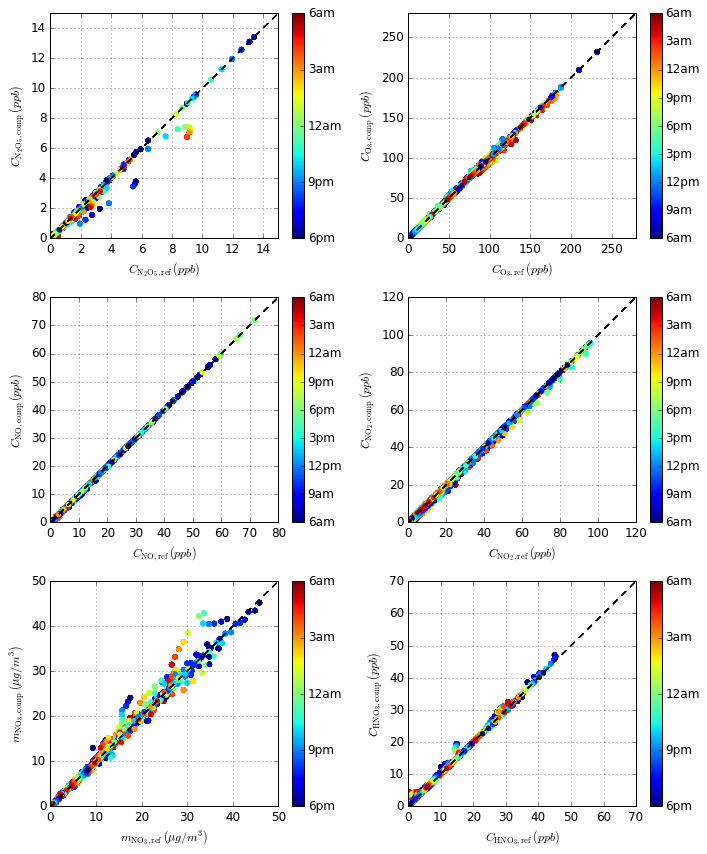

In [42]:
print('Included Seasalt and Dust')
plt.figure(figsize=(10,12))
from matplotlib import style
plt.style.use('classic')
# plt.figure(facecolor="white")
mpl.rc("figure", facecolor="white")

plt.subplot(3,2,1)
for t in range(37, 49, 1):
    p_n2o5 = plt.scatter(df_gas_2ndngt["n2o5_ref"], df_gas_2ndngt["n2o5_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# ax.set_aspect('equal', adjustable='box')
plt.xlim(0,15); plt.ylim(0,15)
plt.xlabel(r'$C_{\rm N_2O_5, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm N_2O_5, comp} \, (ppb)$')
plt.grid()  
    
    
plt.subplot(3,2,2)
for t in range(25, 49, 1):
    p_o3 = plt.scatter(df_gas_2ndday["o3_ref"], df_gas_2ndday["o3_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,3e2],[0,3e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,280); plt.ylim(0,280)
plt.xlabel(r'$C_{\rm O_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm O_3, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,3)
for t in range(25, 49, 1):
    p_no = plt.scatter(df_gas_2ndday["no_ref"], df_gas_2ndday["no_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,80); plt.ylim(0,80)
plt.xlabel(r'$C_{\rm NO, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,4)
for t in range(25, 49, 1):
    p_no2 = plt.scatter(df_gas_2ndday["no2_ref"], df_gas_2ndday["no2_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,120); plt.ylim(0,120)
plt.xlabel(r'$C_{\rm NO_2, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO_2, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,5)
for t in range(37, 49, 1):
    p_no3 = plt.scatter(df_aero_2ndngt["no3_ref"], df_aero_2ndngt["no3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(0,50); plt.ylim(0,50)
plt.xlabel(r'$m_{\rm NO_3, ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm NO_3, comp} \, (\mu g/m^3)$')
plt.grid()

plt.subplot(3,2,6)
for t in range(37, 49, 1):
    p_hno3 = plt.scatter(df_gas_2ndngt["hno3_ref"], df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(0,70); plt.ylim(0,70)
plt.xlabel(r'$C_{\rm HNO_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm HNO_3, comp} \, (ppb)$')
plt.grid()

plt.tight_layout(pad = 1.0)

plt.savefig('/data/keeling/a/yicenl2/d/images/8.pdf')

No Seasalt and Dust


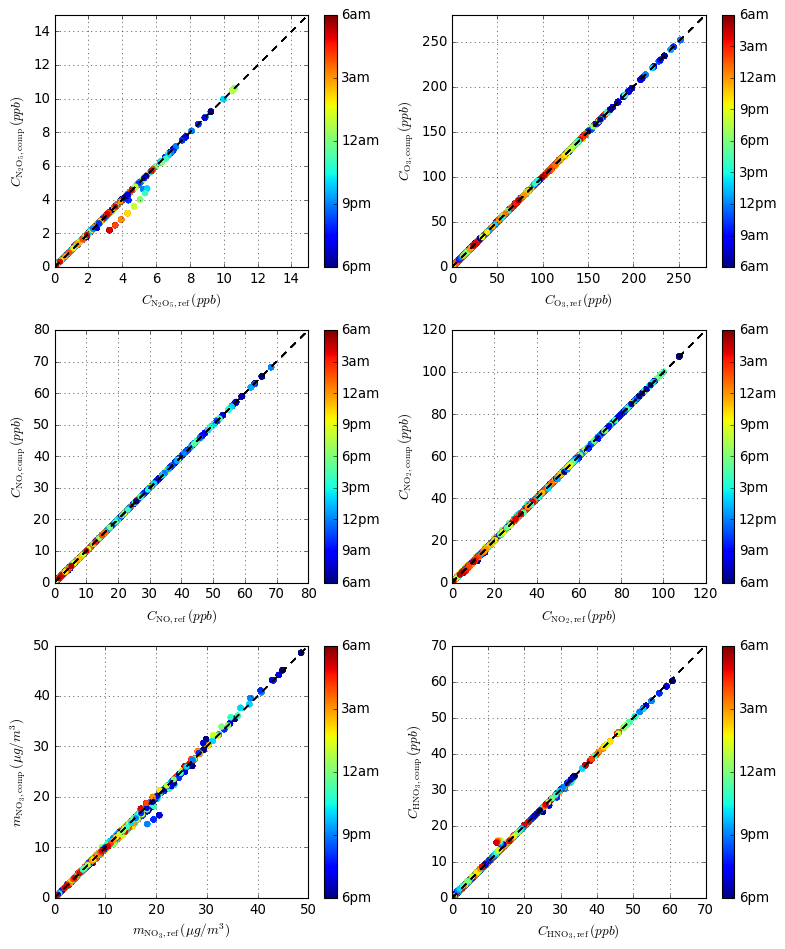

In [11]:
print('No Seasalt and Dust')
plt.figure(figsize=(10,12))
from matplotlib import style
plt.style.use('classic')
# plt.figure(facecolor="white")
mpl.rc("figure", facecolor="white")

plt.subplot(3,2,1)
for t in range(37, 49, 1):
    p_n2o5 = plt.scatter(ndf_gas_2ndngt["n2o5_ref"], ndf_gas_2ndngt["n2o5_comp"], c=nhour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# ax.set_aspect('equal', adjustable='box')
plt.xlim(0,15); plt.ylim(0,15)
plt.xlabel(r'$C_{\rm N_2O_5, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm N_2O_5, comp} \, (ppb)$')
plt.grid()  
    
    
plt.subplot(3,2,2)
for t in range(25, 49, 1):
    p_o3 = plt.scatter(ndf_gas_2ndday["o3_ref"], ndf_gas_2ndday["o3_comp"], c=dn_nhour_index, s=30,edgecolors='none')   
    plt.plot([0,3e2],[0,3e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,280); plt.ylim(0,280)
plt.xlabel(r'$C_{\rm O_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm O_3, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,3)
for t in range(25, 49, 1):
    p_no = plt.scatter(ndf_gas_2ndday["no_ref"], ndf_gas_2ndday["no_comp"], c=dn_nhour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,80); plt.ylim(0,80)
plt.xlabel(r'$C_{\rm NO, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,4)
for t in range(25, 49, 1):
    p_no2 = plt.scatter(ndf_gas_2ndday["no2_ref"], ndf_gas_2ndday["no2_comp"], c=dn_nhour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(0,120); plt.ylim(0,120)
plt.xlabel(r'$C_{\rm NO_2, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO_2, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,5)
for t in range(37, 49, 1):
    p_no3 = plt.scatter(ndf_aero_2ndngt["no3_ref"], ndf_aero_2ndngt["no3_comp"], c=nhour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(0,50); plt.ylim(0,50)
plt.xlabel(r'$m_{\rm NO_3, ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm NO_3, comp} \, (\mu g/m^3)$')
plt.grid()

plt.subplot(3,2,6)
for t in range(37, 49, 1):
    p_hno3 = plt.scatter(ndf_gas_2ndngt["hno3_ref"], ndf_gas_2ndngt["hno3_comp"], c=nhour_index, s=30,edgecolors='none')   
    plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(0,70); plt.ylim(0,70)
plt.xlabel(r'$C_{\rm HNO_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm HNO_3, comp} \, (ppb)$')
plt.grid()

plt.tight_layout(pad = 1.0)
    

## hist gram

In [21]:
s = pd.Series(['n2o5','o3','no','no2'])
print(s)
print(s[0] + '_ref')

0    n2o5
1      o3
2      no
3     no2
dtype: object
n2o5_ref


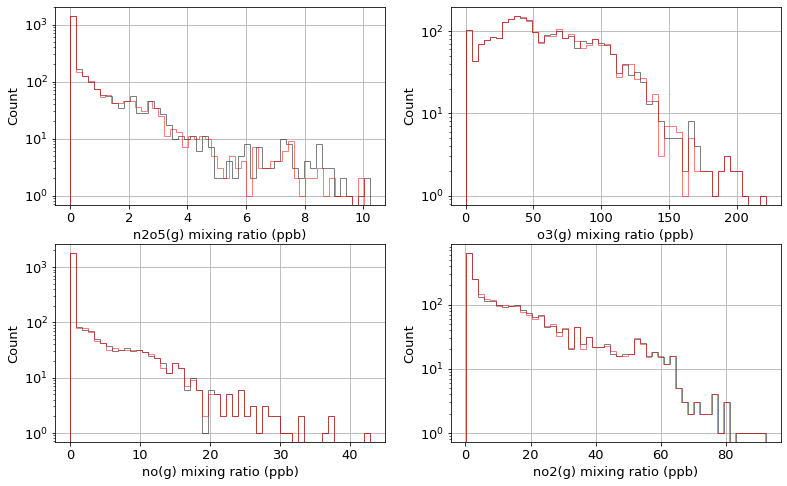

In [22]:
plt.figure(figsize=(13,8))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(data = df_gas, x = s[i] + '_ref', bins = 50, histtype = 'step', edgecolor = 'k', alpha = 0.5)
    plt.hist(data = df_gas, x = s[i]+ '_comp', bins = 50, histtype = 'step', edgecolor = 'r', alpha = 0.5)
    plt.xlabel(s[i] + '(g) mixing ratio (ppb)')
    plt.ylabel('Count')
    plt.yscale('LOG')
    plt.grid()

## time series for 100 scenarios

### $\rm N_2O_5$

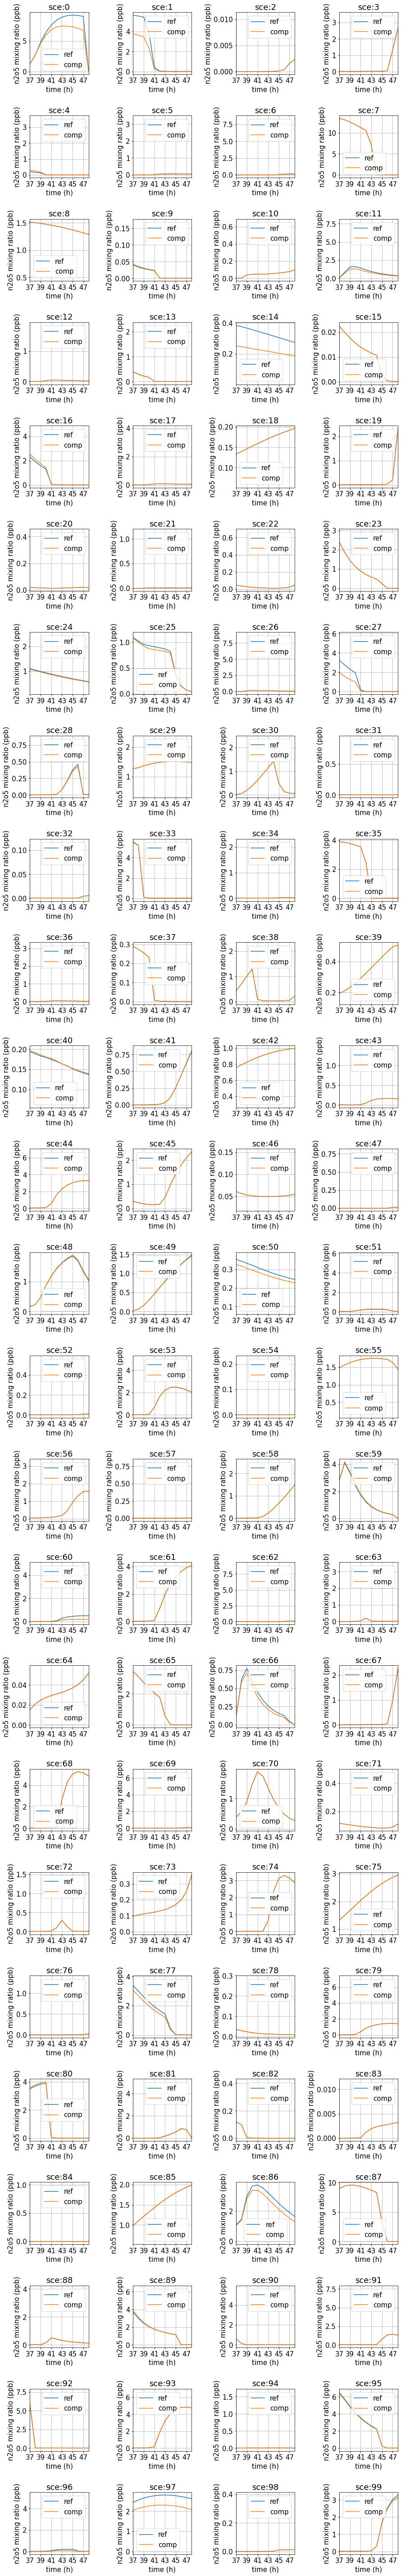

In [8]:
plt.figure(figsize=(13,80))

for sce in range(100):
    plt.subplot(25,4,sce+1)
    plt.plot(time, gas_mixing_ratio[1,sce,:,7], label = 'ref')
    plt.plot(time, gas_mixing_ratio[2,sce,:,7], label = 'comp')
    plt.xlim(37,48)
    plt.xticks(np.arange(37, 49, 2))
#     plt.ylim(0,5)
    plt.title('sce:' + str(sce))
    plt.xlabel('time (h)')
    plt.ylabel('n2o5 mixing ratio (ppb)')
    plt.tight_layout(pad=2.0)
    plt.legend()
    plt.grid()

# plt.yscale('LINEAR')    
# plt.ylabel('Count')

### $\rm O_3$

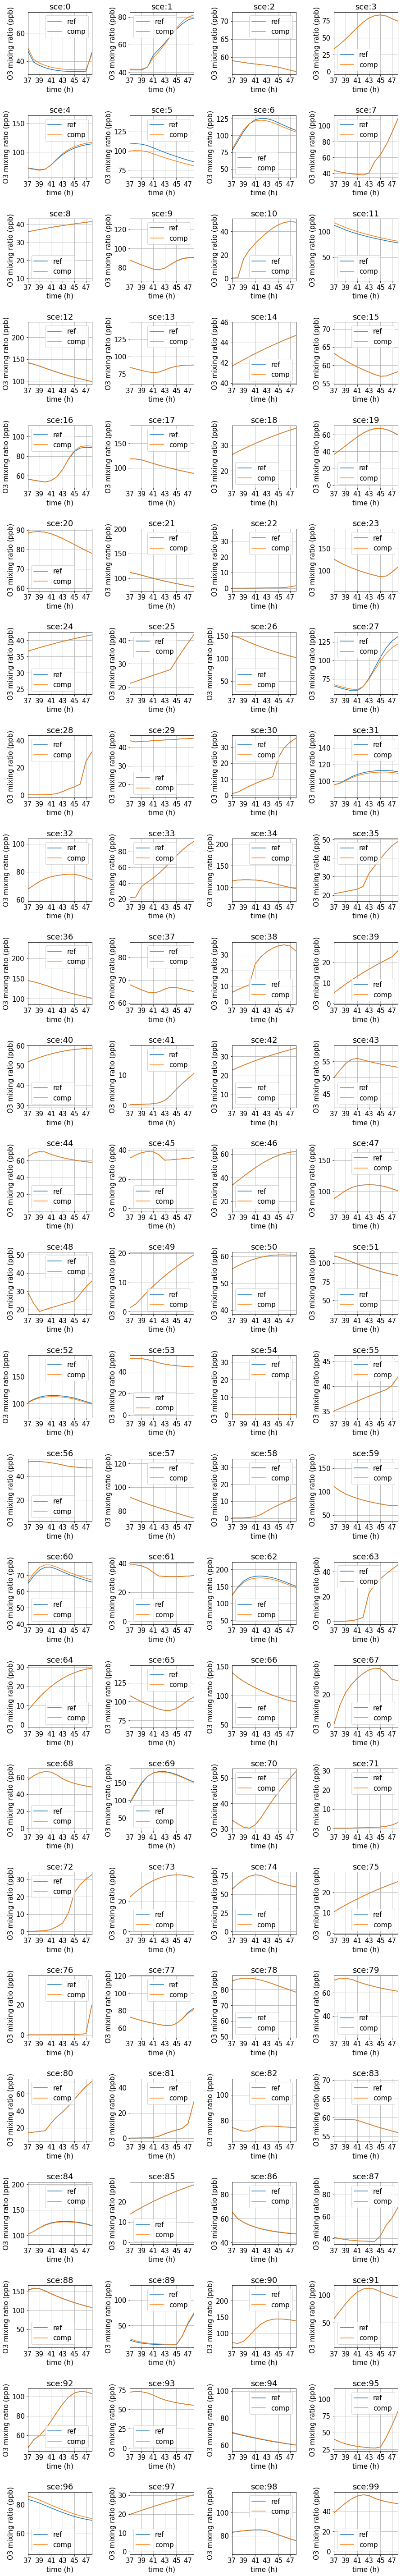

In [4]:
plt.figure(figsize=(13,80))

for sce in range(100):
    plt.subplot(25,4,sce+1)
    plt.plot(time, gas_mixing_ratio[1,sce,:,10], label = 'ref')
    plt.plot(time, gas_mixing_ratio[2,sce,:,10], label = 'comp')
    plt.xlim(37,48)
    plt.xticks(np.arange(37, 49, 2))
#     plt.ylim(0,5)
    plt.title('sce:' + str(sce))
    plt.xlabel('time (h)')
    plt.ylabel('O3 mixing ratio (ppb)')
    plt.tight_layout(pad=2.0)
    plt.legend()
    plt.grid()

# plt.yscale('LINEAR')    
# plt.ylabel('Count')

### $\rm NO$

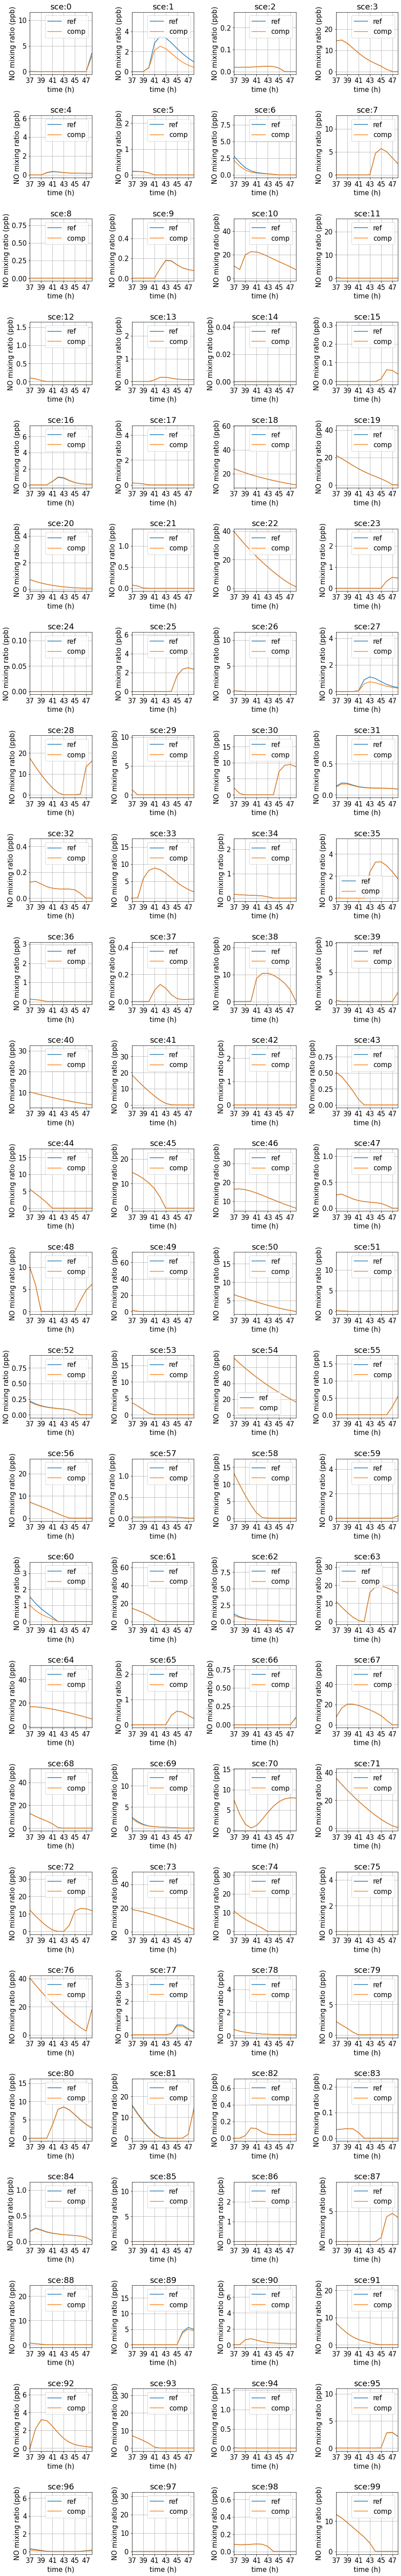

In [5]:
plt.figure(figsize=(13,80))

for sce in range(100):
    plt.subplot(25,4,sce+1)
    plt.plot(time, gas_mixing_ratio[1,sce,:,4], label = 'ref')
    plt.plot(time, gas_mixing_ratio[2,sce,:,4], label = 'comp')
    plt.xlim(37,48)
    plt.xticks(np.arange(37, 49, 2))
#     plt.ylim(0,5)
    plt.title('sce:' + str(sce))
    plt.xlabel('time (h)')
    plt.ylabel('NO mixing ratio (ppb)')
    plt.tight_layout(pad=2.0)
    plt.legend()
    plt.grid()

# plt.yscale('LINEAR')    
# plt.ylabel('Count')

### $\rm NO_2$

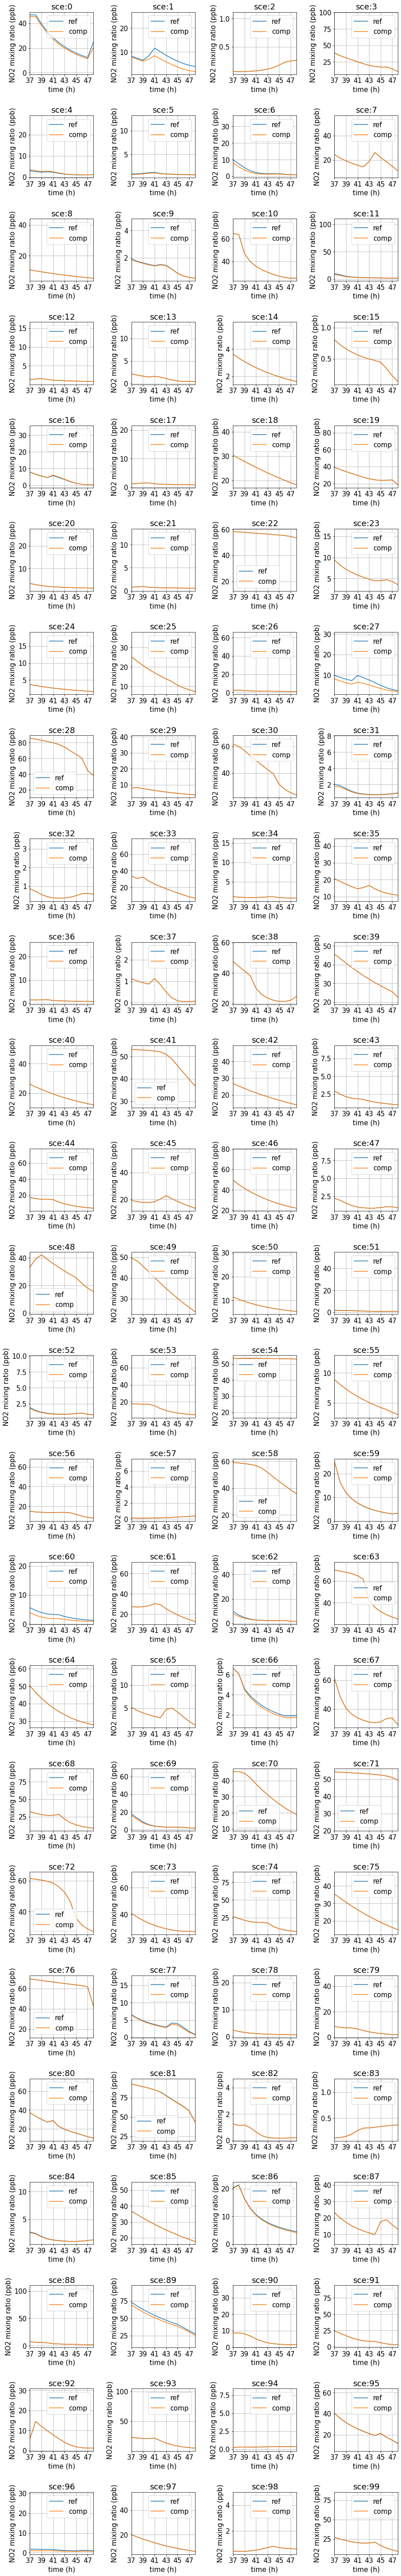

In [6]:
plt.figure(figsize=(13,80))

for sce in range(100):
    plt.subplot(25,4,sce+1)
    plt.plot(time, gas_mixing_ratio[1,sce,:,5], label = 'ref')
    plt.plot(time, gas_mixing_ratio[2,sce,:,5], label = 'comp')
    plt.xlim(37,48)
    plt.xticks(np.arange(37, 49, 2))
#     plt.ylim(0,5)
    plt.title('sce:' + str(sce))
    plt.xlabel('time (h)')
    plt.ylabel('NO2 mixing ratio (ppb)')
    plt.tight_layout(pad=2.0)
    plt.legend()
    plt.grid()

# plt.yscale('LINEAR')    
# plt.ylabel('Count')

### $\rm HNO_3$

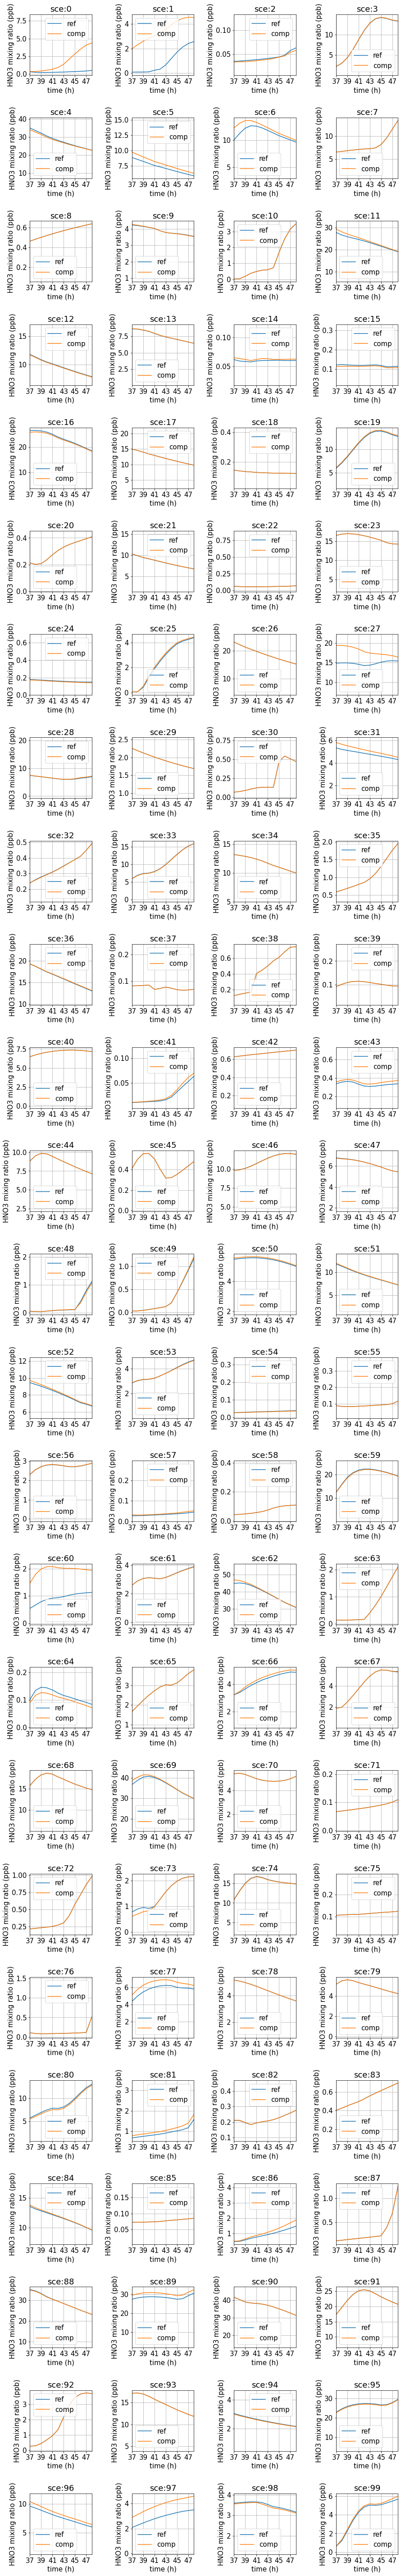

In [7]:
plt.figure(figsize=(13,80))

for sce in range(100):
    plt.subplot(25,4,sce+1)
    plt.plot(time, gas_mixing_ratio[1,sce,:,1], label = 'ref')
    plt.plot(time, gas_mixing_ratio[2,sce,:,1], label = 'comp')
    plt.xlim(37,48)
    plt.xticks(np.arange(37, 49, 2))
#     plt.ylim(0,5)
    plt.title('sce:' + str(sce))
    plt.xlabel('time (h)')
    plt.ylabel('HNO3 mixing ratio (ppb)')
    plt.tight_layout(pad=2.0)
    plt.legend()
    plt.grid()

# plt.yscale('LINEAR')    
# plt.ylabel('Count')

### $\rm NO_3$

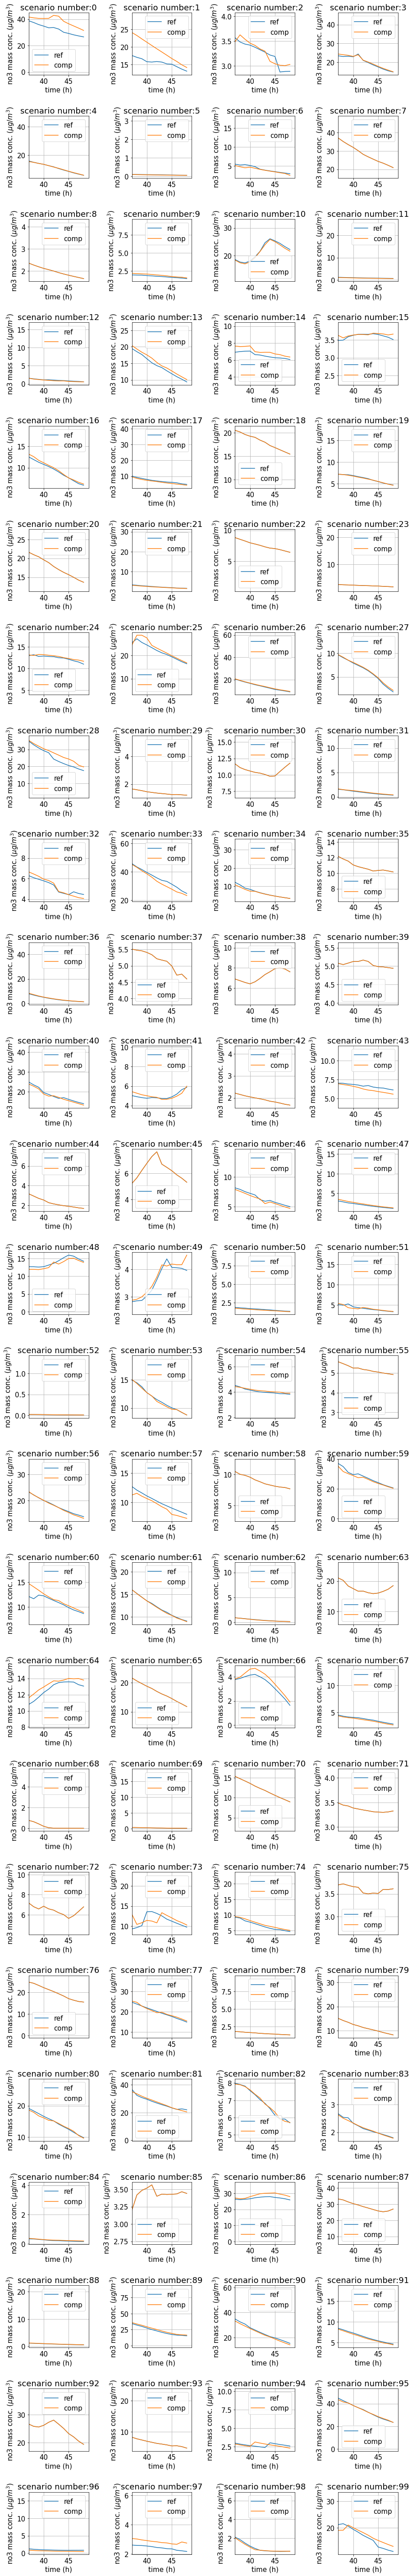

In [18]:
#Make plot
plt.figure(figsize = (13,80))

for sce in range(100):
    plt.subplot(25,4,sce+1)
    plt.plot(time, bulk_conc[1,0,sce,:], label= 'ref')
    plt.plot(time, bulk_conc[2,0,sce,:], label= 'comp')
    plt.title('scenario number:' + str(sce))
    plt.xlim(37,49)
    plt.xlabel('time (h)')
    plt.ylabel('no3 mass conc. ($µg/m^3$)')
    plt.legend()
    plt.grid()
    plt.tight_layout(pad=2.0)

### $\rm NH_4$

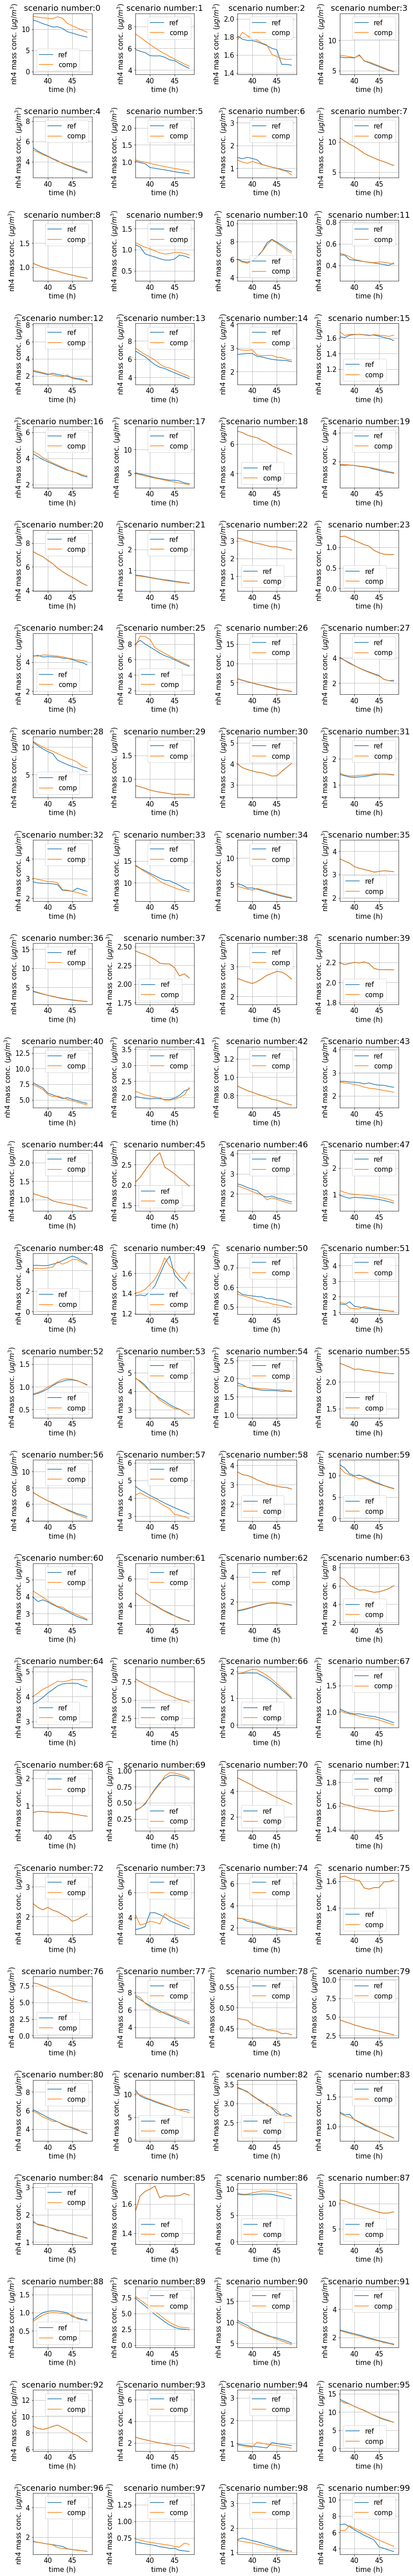

In [19]:
#Make plot
plt.figure(figsize = (13,80))

for sce in range(100):
    plt.subplot(25,4,sce+1)
    plt.plot(time, bulk_conc[1,1,sce,:], label= 'ref')
    plt.plot(time, bulk_conc[2,1,sce,:], label= 'comp')
    plt.title('scenario number:' + str(sce))
    plt.xlim(37,49)
    plt.xlabel('time (h)')
    plt.ylabel('nh4 mass conc. ($µg/m^3$)')
    plt.legend()
    plt.grid()
    plt.tight_layout(pad=2.0)

# surface area and mass concentration

In [23]:
# Read data
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d/0_hydr_noo'
surf_area_dist = np.zeros((2,100,49,180)) # for PR
mass_dist = np.zeros((2,100,49,180)) # for CA

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
#             print(filename)
            sce = int(filename[-38:-36])
            hr = int(filename[-13:-11]) - 1
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to nm
            surf_area_dist[0,sce,hr,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m3 to cm-3
            surf_area_dist[1,sce,hr,:] = ncf.variables["surf_area_dist_comp"].data*1e6 # m3 to cm-3
            mass_dist[0,sce,hr,:] = ncf.variables["mass_dist_pr"].data*1e6 # kg to mg
            mass_dist[1,sce,hr,:] = ncf.variables["mass_dist_comp"].data*1e6 # kg to mg

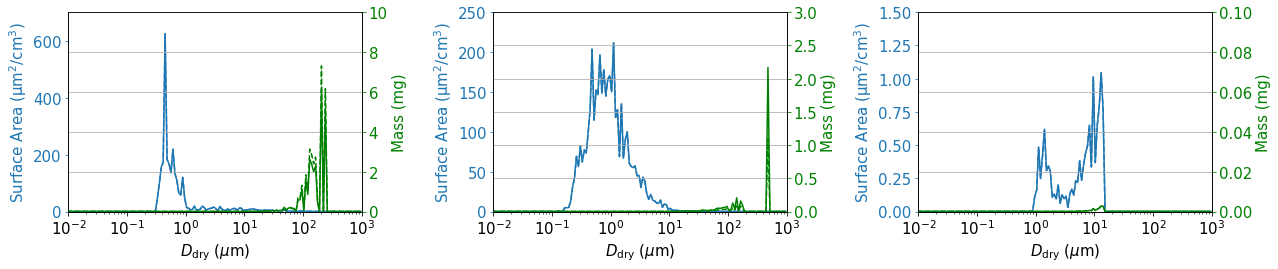

In [24]:
plt.figure(figsize=(18,4))

# Above 1:1 Line
plt.subplot(1,3,1)
sce_index = 97
t_index = 17
plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,2.1e3)
plt.plot(diam, surf_area_dist[0,sce_index, t_index, :], label='PR', lw=1.5, color='#1f77b4')
plt.plot(diam, surf_area_dist[1,sce_index, t_index, :], label='CA', lw=1.5, ls='--', color='#1f77b4')
plt.ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)', color='#1f77b4')
plt.tick_params(axis='y', colors='#1f77b4')
plt.xlim(1e-2,1e3)
plt.ylim(0,700)
plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
# plt.text(0.015, 455, r'sce:%d T:%d h'% (sce_index, t_index))
ax = plt.twinx()
p2 = ax.plot(diam, mass_dist[0,sce_index, t_index, :], label='mass', lw=1.5, color='green')
p2 = ax.plot(diam, mass_dist[1,sce_index, t_index, :], label='mass', lw=1.5, ls='--', color='green')
ax.set_ylim(0,10)
ax.tick_params(axis='y', colors='green')
ax.set_ylabel('Mass (mg)', color='green')
plt.grid()

# On 1:1 Line
plt.subplot(1,3,2)
sce_index = 86
t_index = 19
plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,2.1e3)
plt.plot(diam, surf_area_dist[0,sce_index, t_index, :], label='surf_area', lw=1.5, color='#1f77b4')
plt.plot(diam, surf_area_dist[1,sce_index, t_index, :], label='CA', lw=1.5, ls='--', color='#1f77b4')
plt.ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)', color='#1f77b4')
plt.tick_params(axis='y', colors='#1f77b4')
plt.xlim(1e-2,1e3)
plt.ylim(0,250)
plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
# plt.text(0.015, 90, r'sce:%d T:%d h'% (sce_index, t_index))
ax = plt.twinx()
p2 = ax.plot(diam, mass_dist[0,sce_index, t_index, :], label='mass', lw=1.5, color='green')
p2 = ax.plot(diam, mass_dist[1,sce_index, t_index, :], label='mass', lw=1.5, ls='--', color='green')
ax.set_ylim(0,3)
ax.tick_params(axis='y', colors='green')
ax.set_ylabel('Mass (mg)', color='green')
plt.grid()

# Below 1:1 Line
plt.subplot(1,3,3)
sce_index = 21
t_index = 44
plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,2.1e3)
plt.plot(diam, surf_area_dist[0,sce_index, t_index, :], label='surf_area', lw=1.5, color='#1f77b4')
plt.plot(diam, surf_area_dist[1,sce_index, t_index, :], label='CA', lw=1.5, ls='--', color='#1f77b4')
plt.ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)', color='#1f77b4')
plt.tick_params(axis='y', colors='#1f77b4')
plt.xlim(1e-2,1e3)
plt.ylim(0,1.5)
plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
# plt.text(0.015, 90, r'sce:%d T:%d h'% (sce_index, t_index))
ax = plt.twinx()
p2 = ax.plot(diam, mass_dist[0,sce_index, t_index, :], label='mass', lw=1.5, color='green')
p2 = ax.plot(diam, mass_dist[1,sce_index, t_index, :], label='mass', lw=1.5, ls='--', color='green')
ax.set_ylim(0,0.1)
ax.tick_params(axis='y', colors='green')
ax.set_ylabel('Mass (mg)', color='green')
plt.grid()

plt.tight_layout()

# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')

In [13]:
# Read data
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d/0_hydr_noo'
nsurf_area_dist = np.zeros((2,100,49,180)) # for PR
nmass_dist = np.zeros((2,100,49,180)) # for CA

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
#             print(filename)
            nsce = int(filename[-38:-36])
            nhr = int(filename[-13:-11]) - 1
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to nm
            nsurf_area_dist[0,nsce,nhr,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m3 to cm-3
            nsurf_area_dist[1,nsce,nhr,:] = ncf.variables["surf_area_dist_comp"].data*1e6 # m3 to cm-3
            nmass_dist[0,nsce,nhr,:] = ncf.variables["mass_dist_pr"].data*1e6 # kg to mg
            nmass_dist[1,nsce,nhr,:] = ncf.variables["mass_dist_comp"].data*1e6 # kg to mg

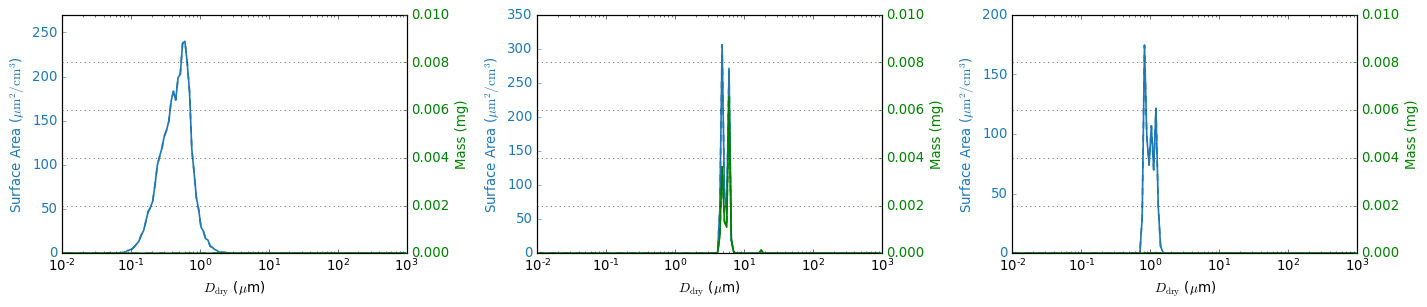

In [19]:
plt.figure(figsize=(18,4))

# Above 1:1 Line
plt.subplot(1,3,1)
sce_index = 97
t_index = 17
plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,2.1e3)
plt.plot(diam, nsurf_area_dist[0,sce_index, t_index, :], label='PR', lw=1.5, color='#1f77b4')
plt.plot(diam, nsurf_area_dist[1,sce_index, t_index, :], label='CA', lw=1.5, ls='--', color='#1f77b4')
plt.ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)', color='#1f77b4')
plt.tick_params(axis='y', colors='#1f77b4')
plt.xlim(1e-2,1e3)
plt.ylim(0,270)
plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
# plt.text(0.015, 455, r'sce:%d T:%d h'% (sce_index, t_index))
ax = plt.twinx()
p2 = ax.plot(diam, nmass_dist[0,sce_index, t_index, :], label='mass', lw=1.5, color='green')
p2 = ax.plot(diam, nmass_dist[1,sce_index, t_index, :], label='mass', lw=1.5, ls='--', color='green')
ax.set_ylim(0,0.01)
ax.tick_params(axis='y', colors='green')
ax.set_ylabel('Mass (mg)', color='green')
plt.grid()

# On 1:1 Line
plt.subplot(1,3,2)
sce_index = 86
t_index = 19
plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,2.1e3)
plt.plot(diam, nsurf_area_dist[0,sce_index, t_index, :], label='surf_area', lw=1.5, color='#1f77b4')
plt.plot(diam, nsurf_area_dist[1,sce_index, t_index, :], label='CA', lw=1.5, ls='--', color='#1f77b4')
plt.ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)', color='#1f77b4')
plt.tick_params(axis='y', colors='#1f77b4')
plt.xlim(1e-2,1e3)
plt.ylim(0,350)
plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
# plt.text(0.015, 90, r'sce:%d T:%d h'% (sce_index, t_index))
ax = plt.twinx()
p2 = ax.plot(diam, nmass_dist[0,sce_index, t_index, :], label='mass', lw=1.5, color='green')
p2 = ax.plot(diam, nmass_dist[1,sce_index, t_index, :], label='mass', lw=1.5, ls='--', color='green')
ax.set_ylim(0,0.01)
ax.tick_params(axis='y', colors='green')
ax.set_ylabel('Mass (mg)', color='green')
plt.grid()

# Below 1:1 Line
plt.subplot(1,3,3)
sce_index = 35
t_index = 44
plt.xscale('log');plt.xlim(1e-2, 1e3);plt.ylim(0,2.1e3)
plt.plot(diam, nsurf_area_dist[0,sce_index, t_index, :], label='surf_area', lw=1.5, color='#1f77b4')
plt.plot(diam, nsurf_area_dist[1,sce_index, t_index, :], label='CA', lw=1.5, ls='--', color='#1f77b4')
plt.ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)', color='#1f77b4')
plt.tick_params(axis='y', colors='#1f77b4')
plt.xlim(1e-2,1e3)
plt.ylim(0,200)
plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
# plt.text(0.015, 90, r'sce:%d T:%d h'% (sce_index, t_index))
ax = plt.twinx()
p2 = ax.plot(diam, nmass_dist[0,sce_index, t_index, :], label='mass', lw=1.5, color='green')
p2 = ax.plot(diam, nmass_dist[1,sce_index, t_index, :], label='mass', lw=1.5, ls='--', color='green')
ax.set_ylim(0,0.01)
ax.tick_params(axis='y', colors='green')
ax.set_ylabel('Mass (mg)', color='green')
plt.grid()

plt.tight_layout()

# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')

# 2d size bin

In [32]:
s = pd.Series(['no3','so4','wi','oin','na','cl','oc','soa','bc','nh4'])
print(s)

0    no3
1    so4
2     wi
3    oin
4     na
5     cl
6     oc
7    soa
8     bc
9    nh4
dtype: object


In [33]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d/0_hydr_noo/scenarios/scenario_0097'
nmass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

In [35]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d/0_hydr_noo/scenarios/scenario_0048'
mass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                mass_frac_dist[i, t_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

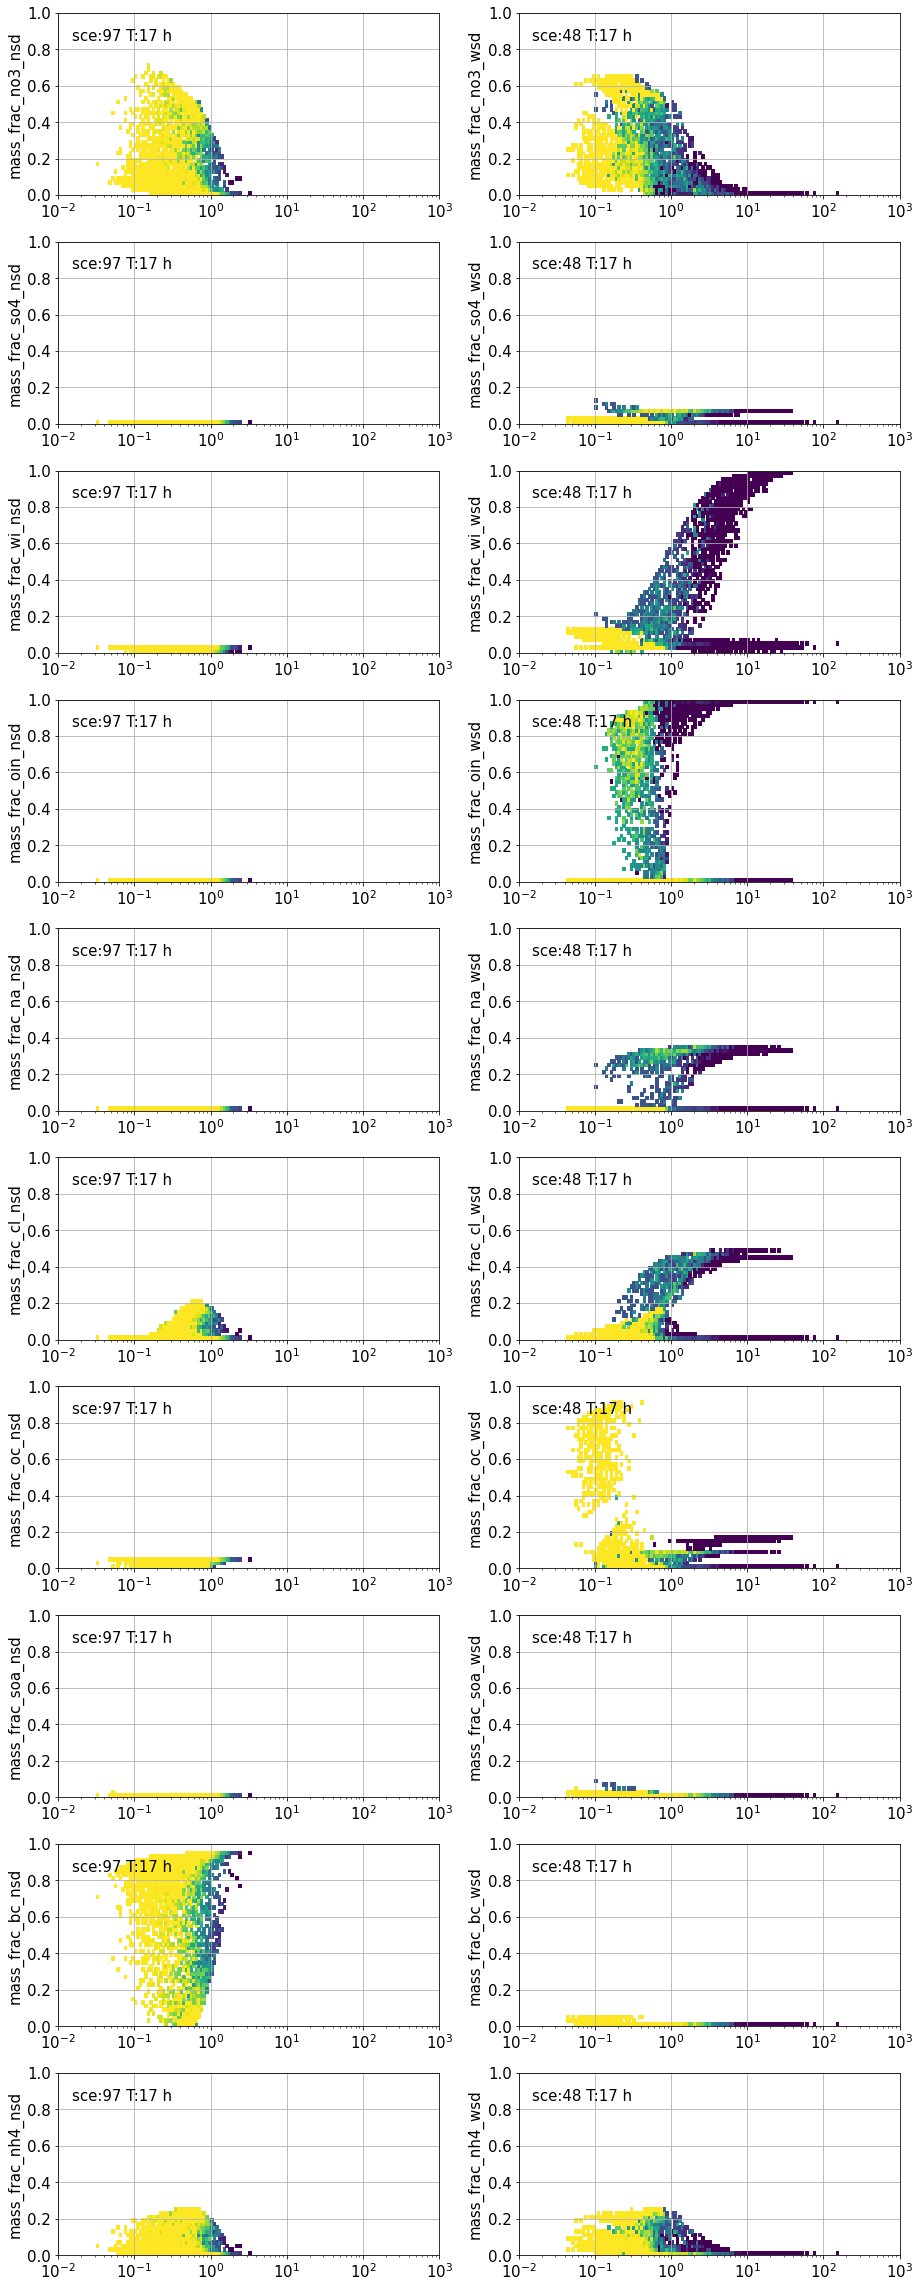

In [36]:
plt.figure(figsize=(13,32))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(10,2,2*i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[i,17,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel("mass_frac_" + s[i] + "_nsd")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (97, 17))
    plt.grid(True)
    plt.tight_layout(pad=1.0)
    
    plt.subplot(10,2,2*i+2)
    p = plt.pcolormesh (X, Y, mass_frac_dist[i,17,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel("mass_frac_" + s[i] + "_wsd")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (48, 17))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

In [26]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d/0_hydr_noo/scenarios/scenario_0021'
lmass_frac_dist = np.zeros((9,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            lt_index = int(filename[-13:-11]) - 1
            lsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(9):
                lmass_frac_dist[i, lt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

In [27]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d/0_hydr_noo/scenarios/scenario_0014'
hmass_frac_dist = np.zeros((9,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            ht_index = int(filename[-13:-11]) - 1
            hsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(9):
                hmass_frac_dist[i, ht_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

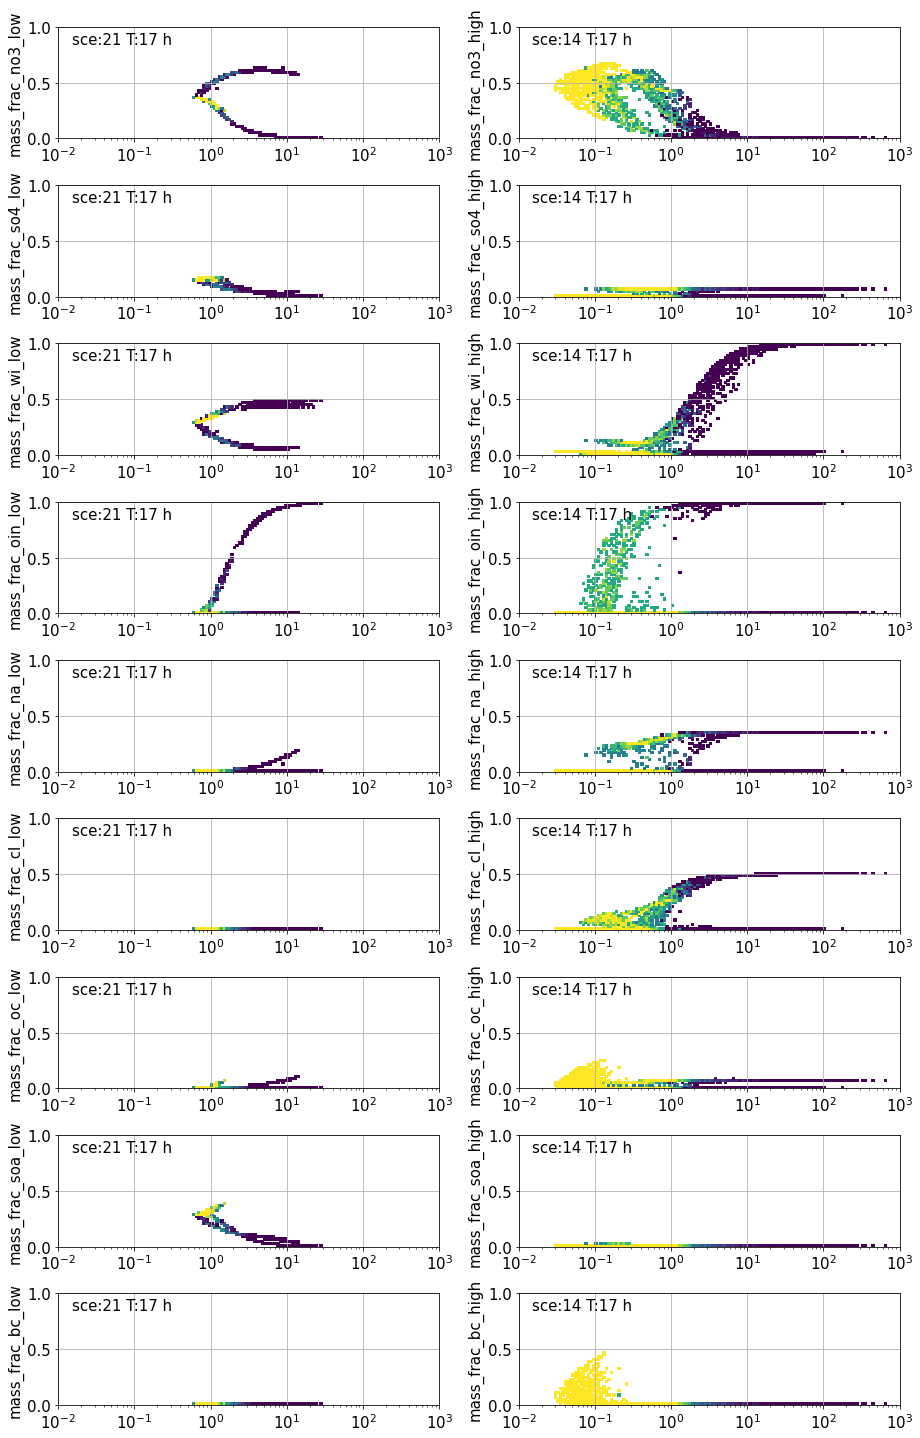

In [28]:
plt.figure(figsize=(13,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(9):
    plt.subplot(9,2,2*i+1)
    p = plt.pcolormesh (X, Y, lmass_frac_dist[i,17,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel("mass_frac_" + s[i] + "_low")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (21, 17))
    plt.grid(True)
    plt.tight_layout(pad=1.0)
    
    plt.subplot(9,2,2*i+2)
    p = plt.pcolormesh (X, Y, hmass_frac_dist[i,17,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel("mass_frac_" + s[i] + "_high")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (14, 17))
    plt.grid(True)
    plt.tight_layout(pad=1.0)